In [123]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib
import matplotlib.pyplot as plt
import os

In [124]:
df = pd.read_csv("postprandial_imputed.csv", sep=";")

In [125]:
df.head(30)

,Unnamed: 0,subject,challenge_time,challenge,C10 (decanoylcarnitine)_biocrates,C10:1 (decenoylcarnitine)_biocrates,C12 (dodecanoylcarnitine)_biocrates,C12:1 (dodecenoylcarnitine)_biocrates,C14 (tetradecanoylcarnitine)_biocrates,C14:1 (tetradecenoylcarnitine)_biocrates,...,piperine_metabolon,quinate_metabolon,S-allylcysteine_metabolon,stachydrine_metabolon,sulfate*_metabolon,tartarate_metabolon,tartronate (hydroxymalonate)_metabolon,theobromine_metabolon,theophylline_metabolon,thymol sulfate_metabolon
0,1,1,0,ogtt,"-2,79886803309211","-3,46753341713426","-4,05649119883826","-4,31043245604953","-5,21089678249862","-4,87832144341175",...,"3,8775970286579","0,917393563089982","0,822444639404617","0,57201651312894","0,0207688650945719","0,392537245275131","-0,798868033092113","-1,97766769990194","0,765874164089725","0,0244615301409958"
1,2,1,15,ogtt,"-2,90616942836486","-3,51457317282976","-4,05649119883826","-4,53282487738598","-5,21089678249862","-4,69525534228137",...,"3,81984186861969","0,754374452712511","0,772730247767181","0,585923976958601","0,0236102151826453","-0,0436459153546316","-0,935117148415146","-1,87461339463419","0,383496944155365","0,007339046008162"
2,3,1,30,ogtt,"-2,98964981183043","-3,48358135836613","-4,38986692354394","-4,5631985264295","-5,05889368905357","-4,91702497274223",...,"3,85513259349198","0,699018518626197","0,657274140743583","0,511872807474043","-0,00245466862951544","-0,22398025935253","-1,05319429380946","-1,87144263502624","0,584577730738641","0,0156402903768822"
3,4,1,45,ogtt,"-3,04334854442894","-3,5631985264295","-4,12280545287376","-4,5631985264295","-5,15842936260448","-5,17918792277128",...,"3,91208455490287","0,95345150136626","0,650396946669789","0,531269159882994","0,0190613650934302","0,175428790822257","-1,04602709194782","-1,63128751627167","0,598651047884608","-0,0442408411531195"
4,5,1,60,ogtt,"-3,22027801879293","-3,7178567712185","-4,44536203613564","-4,79585928321977","-5,21089678249862","-5,33351606916257",...,"3,84675405062994","0,806942664577762","0,675093273820292","0,510860673967615","-0,0375620290770118","0,31973353013315","-1,12847172913778","-1,94230713283165","0,62760683812965","-0,0671828972581494"
5,6,1,90,ogtt,"-3,04334854442894","-3,6474674433271","-4,82418800627827","-4,59422542205012","-5,21089678249862","-5,08804003471309",...,"3,85466396101425","1,24031432933371","0,608336150347661","0,53605290024021","-0,0978878206694321","-0,391379975639508","-0,654490075748661","-1,85464861442738","0,514299034728045","-0,349051669780258"
6,7,1,120,ogtt,"-2,66474543475894","-3,49817873457909","-4,21357091679694","-4,44536203613564","-5,05889368905357","-4,91702497274223",...,"4,12175314252423","1,03850641826384","0,570268615578123","0,498557248099017","-0,0860478908380365","-0,161330549006808","-1,16262184024619","-1,75146516386132","0,642655367889502","-0,440850852262743"
7,8,1,180,ogtt,"-3,17136841831198","-3,81197894858305","-4,47393118833241","-5,07339325874868","-5,50635266602479","-5,55979192498625",...,"3,94321808742628","0,736128588287315","0,421909973094829","0,466653220122747","-0,181313019244306","0,144699025154139","-0,441830345165388","-2,02034044828418","0,445514838302112","-0,517254954617427"
8,9,1,240,ogtt,"-2,67392291507687","-3,5462453931483","-4,0782590139205","-4,50307753399193","-5,10780328953452","-4,83650126771712",...,"3,7659484010741","0,517527670337266","0,418999465431266","0,374733478031214","-0,145286177230469","-0,295128035543647","-0,839337919886656","-2,09974178756525","0,275841423140611","-0,471728752896724"
9,10,2,0,ogtt,"-2,51457317282976","-3,66383088953599","-4,08314123530025","-3,77595972578207","-4,99769353261683","-3,35254732994575",...,"1,0913274776911","2,55780217348035","2,72711449791265","-0,0402298447885327","0,0764222754586024","-0,507787877581542","-0,00476876643436136","-1,88790042022376","1,60283691180354","1,89475956939313"


# Data Exploration
- 9 samples every 15 minutes for the OGTT
- 7 samples every 30 minutes for OLTT
- 5 samples every 60 minutes for SLD

The Participants
- 15 healthy male participants were recruited to be as homogeneous as possible
- Average age of 27.8 ± 2.9 years 
- Normal weight [body mass index (BMI) of 23.1 ± 1.8 kg/m²]
- Participants did not take any medication, and none of the participants showed any metabolic abnormalities according to standard clinical chemistry

In [126]:
df[df['subject'] == 1]

,Unnamed: 0,subject,challenge_time,challenge,C10 (decanoylcarnitine)_biocrates,C10:1 (decenoylcarnitine)_biocrates,C12 (dodecanoylcarnitine)_biocrates,C12:1 (dodecenoylcarnitine)_biocrates,C14 (tetradecanoylcarnitine)_biocrates,C14:1 (tetradecenoylcarnitine)_biocrates,...,piperine_metabolon,quinate_metabolon,S-allylcysteine_metabolon,stachydrine_metabolon,sulfate*_metabolon,tartarate_metabolon,tartronate (hydroxymalonate)_metabolon,theobromine_metabolon,theophylline_metabolon,thymol sulfate_metabolon
0,1,1,0,ogtt,"-2,79886803309211","-3,46753341713426","-4,05649119883826","-4,31043245604953","-5,21089678249862","-4,87832144341175",...,"3,8775970286579","0,917393563089982","0,822444639404617","0,57201651312894","0,0207688650945719","0,392537245275131","-0,798868033092113","-1,97766769990194","0,765874164089725","0,0244615301409958"
1,2,1,15,ogtt,"-2,90616942836486","-3,51457317282976","-4,05649119883826","-4,53282487738598","-5,21089678249862","-4,69525534228137",...,"3,81984186861969","0,754374452712511","0,772730247767181","0,585923976958601","0,0236102151826453","-0,0436459153546316","-0,935117148415146","-1,87461339463419","0,383496944155365","0,007339046008162"
2,3,1,30,ogtt,"-2,98964981183043","-3,48358135836613","-4,38986692354394","-4,5631985264295","-5,05889368905357","-4,91702497274223",...,"3,85513259349198","0,699018518626197","0,657274140743583","0,511872807474043","-0,00245466862951544","-0,22398025935253","-1,05319429380946","-1,87144263502624","0,584577730738641","0,0156402903768822"
3,4,1,45,ogtt,"-3,04334854442894","-3,5631985264295","-4,12280545287376","-4,5631985264295","-5,15842936260448","-5,17918792277128",...,"3,91208455490287","0,95345150136626","0,650396946669789","0,531269159882994","0,0190613650934302","0,175428790822257","-1,04602709194782","-1,63128751627167","0,598651047884608","-0,0442408411531195"
4,5,1,60,ogtt,"-3,22027801879293","-3,7178567712185","-4,44536203613564","-4,79585928321977","-5,21089678249862","-5,33351606916257",...,"3,84675405062994","0,806942664577762","0,675093273820292","0,510860673967615","-0,0375620290770118","0,31973353013315","-1,12847172913778","-1,94230713283165","0,62760683812965","-0,0671828972581494"
5,6,1,90,ogtt,"-3,04334854442894","-3,6474674433271","-4,82418800627827","-4,59422542205012","-5,21089678249862","-5,08804003471309",...,"3,85466396101425","1,24031432933371","0,608336150347661","0,53605290024021","-0,0978878206694321","-0,391379975639508","-0,654490075748661","-1,85464861442738","0,514299034728045","-0,349051669780258"
6,7,1,120,ogtt,"-2,66474543475894","-3,49817873457909","-4,21357091679694","-4,44536203613564","-5,05889368905357","-4,91702497274223",...,"4,12175314252423","1,03850641826384","0,570268615578123","0,498557248099017","-0,0860478908380365","-0,161330549006808","-1,16262184024619","-1,75146516386132","0,642655367889502","-0,440850852262743"
7,8,1,180,ogtt,"-3,17136841831198","-3,81197894858305","-4,47393118833241","-5,07339325874868","-5,50635266602479","-5,55979192498625",...,"3,94321808742628","0,736128588287315","0,421909973094829","0,466653220122747","-0,181313019244306","0,144699025154139","-0,441830345165388","-2,02034044828418","0,445514838302112","-0,517254954617427"
8,9,1,240,ogtt,"-2,67392291507687","-3,5462453931483","-4,0782590139205","-4,50307753399193","-5,10780328953452","-4,83650126771712",...,"3,7659484010741","0,517527670337266","0,418999465431266","0,374733478031214","-0,145286177230469","-0,295128035543647","-0,839337919886656","-2,09974178756525","0,275841423140611","-0,471728752896724"
135,136,1,0,oltt,"-1,74855356844142","-2,71880622504737","-2,91593573521153","-3,12784104277106","-5,01158797427521","-3,5462453931483",...,"2,46393627950641","-0,591396820656629","-1,79435725805454","0,282854909322555","-0,31061137277834","-0,283491913231254","-0,00505828982302896","0,2096405139276","-0,0782590139204995","-2,22296961479919"


Non-targeted metabolomics (broad profiling)

- Metabolites were quantified using LC–MS/MS platforms (Liquid Chromatography – Tandem Mass Spectrometry)

- The output was relative quantification, based on peak area-under-the-curve values


Targeted metabolomics 

- For 132 selected metabolites, they reported absolute concentrations

- µM, micromoles per liter

- This targeted panel mostly covered amino acids, carbohydrates, and lipids



The majority of metabolites (595 total) are reported in relative normalized units (not µM, but relative abundances).

A subset of 132 metabolites (from the Biocrates kit) are reported in absolute concentrations (µM).

## Insulin and Glucose are also measured with the other metabolites

In [127]:
df[["insulin_biochemistry", "glucose_metabolon", "subject", "challenge", "challenge_time"]].head(15)

,insulin_biochemistry,glucose_metabolon,subject,challenge,challenge_time
0,"2,4905701304462","-0,154730761020099",1,ogtt,0
1,"4,93073733756289","0,393526032228356",1,ogtt,15
2,"5,51822038059959","0,508631477646895",1,ogtt,30
3,"6,08703845676695","0,234256047688296",1,ogtt,45
4,"5,37920505996061","0,268554164033543",1,ogtt,60
5,"5,42021289061078","0,105946211905325",1,ogtt,90
6,"4,08491465976794","-0,0744562413015066",1,ogtt,120
7,"2,27500704749987","-0,467533417134262",1,ogtt,180
8,"2,10768786931437","-0,256528117408607",1,ogtt,240
9,"2,81147103052984","-0,0781067104058805",2,ogtt,0


## Missing Values

Removed outliers ​

- It was more than 4 standard deviations away from the average for that metabolite.​

- It happened after 30 minutes (because the biggest normal changes were expected right
after eating, in the first 30 min​

    - They found 163 suspicious points.​

        - If the “spike” was only in one person but not in anyone else at that timepoint, they assumed it was a
        measurement error.​

        - 92 data points were removed​

    - If a metabolite was missing in more than 30% of samples, it was completely excluded from the
dataset.​

        - This removed 93 metabolites.​

Imputed missing data with a machine learning method (missForest).​

Log-transformed data for analysis.​

The resulting data matrix​

- 634 metabolites × 20 sampling time points × 15 participants

In [128]:
null_counts = df.isnull().sum().sort_values(ascending=False)
# convert the Series to a DataFrame for nicer display
null_df = null_counts.reset_index()
null_df.columns = ['column', 'null_count']
null_df

,column,null_count
0,sebacate (decanedioate)_metabolon,133
1,cis-aconitate_metabolon,110
2,xanthosine_metabolon,93
3,"5alpha-androstan-3alpha,17alpha-diol disulfate...",75
4,1-behenoyl-GPC (22:0)_metabolon,75
...,...,...
634,subject,0
635,insulin_biochemistry,0
636,challenge,0
637,challenge_time,0


- insulin has every value


In [129]:
null_df[null_df['null_count'] == 0]

,column,null_count
634,subject,0
635,insulin_biochemistry,0
636,challenge,0
637,challenge_time,0
638,Unnamed: 0,0


## Average values per test and time

In [130]:
meta_cols = ["subject", "challenge", "challenge_time"]

for col in df.columns:
    if col not in meta_cols:
        # Replace ',' with '.' and convert to float
        df[col] = df[col].astype(str).str.replace(",", ".").astype(float)

In [131]:
metabolite_cols = [c for c in df.columns if c not in meta_cols]



metabolite_cols.remove("Unnamed: 0")  


# Group by challenge and time, then average only metabolites
grouped_means = df.groupby(["challenge", "challenge_time"])[metabolite_cols].mean().reset_index()

grouped_means

,challenge,challenge_time,C10 (decanoylcarnitine)_biocrates,C10:1 (decenoylcarnitine)_biocrates,C12 (dodecanoylcarnitine)_biocrates,C12:1 (dodecenoylcarnitine)_biocrates,C14 (tetradecanoylcarnitine)_biocrates,C14:1 (tetradecenoylcarnitine)_biocrates,C14:1-OH (hydroxytetradecenoylcarnitine)_biocrates,C14:2 (tetradecadienylcarnitine)_biocrates,...,piperine_metabolon,quinate_metabolon,S-allylcysteine_metabolon,stachydrine_metabolon,sulfate*_metabolon,tartarate_metabolon,tartronate (hydroxymalonate)_metabolon,theobromine_metabolon,theophylline_metabolon,thymol sulfate_metabolon
0,ogtt,0,-2.194342,-3.171952,-3.678796,-3.374554,-4.843736,-3.480499,-6.264129,-5.512709,...,1.381072,1.325051,1.559989,-0.128742,-0.053751,-0.114726,-0.145766,-2.063272,0.970299,0.834092
1,ogtt,15,-2.189665,-3.121751,-3.668778,-3.312145,-4.839970,-3.471461,-6.296325,-5.546567,...,1.317822,1.215958,1.582673,-0.100290,-0.056832,-0.062591,-0.308634,-2.131023,0.893954,0.798425
2,ogtt,30,-2.394080,-3.309830,-3.851125,-3.474204,-4.819048,-3.576049,-6.300113,-5.745440,...,1.269161,1.096943,1.459199,-0.171503,-0.117836,-0.010047,-0.082379,-2.060546,0.824072,0.724187
3,ogtt,45,-2.620072,-3.469460,-3.915168,-3.651589,-4.845394,-3.739601,-6.334437,-6.065616,...,1.280326,1.129328,1.412508,-0.161969,-0.122034,0.039610,-0.157967,-2.101437,0.865354,0.771386
4,ogtt,60,-2.720799,-3.563146,-4.093708,-3.843246,-4.959990,-3.801626,-6.457001,-6.256090,...,1.441559,1.155639,1.458872,-0.138041,-0.101736,0.005891,-0.104556,-2.060376,0.823410,0.691978
5,ogtt,90,-2.852042,-3.642238,-4.291410,-3.808855,-5.103967,-3.854753,-6.499711,-6.347725,...,1.412728,1.119899,1.408121,-0.141271,-0.153637,-0.057474,-0.205619,-2.134814,0.748075,0.646200
6,ogtt,120,-2.821885,-3.755042,-4.308974,-3.982298,-5.135838,-3.897491,-6.656899,-6.392289,...,1.389755,1.044972,1.358897,-0.159470,-0.129416,0.079031,-0.146173,-2.210802,0.754717,0.589390
7,ogtt,180,-2.758745,-3.637112,-4.264587,-3.849392,-5.178171,-3.879658,-6.648472,-6.376657,...,1.398160,0.994000,1.238229,-0.078421,-0.146133,0.082234,-0.197951,-2.421547,0.675638,0.480951
8,ogtt,240,-2.380710,-3.321551,-3.978743,-3.499555,-5.021338,-3.662787,-6.513878,-5.858033,...,1.137024,0.988135,1.156075,-0.260278,-0.190663,-0.065473,-0.241709,-2.340609,0.580766,0.538827
9,oltt,0,-1.900245,-2.916340,-3.529316,-3.051998,-4.927773,-3.180854,-6.226170,-5.121362,...,-0.954080,-0.332505,-0.927820,-0.241438,-0.015805,0.142650,0.194643,0.118354,-0.040650,-0.712806


Average insulin and glucose per test per time


In [132]:
grouped_means[["challenge", "challenge_time", "glucose_metabolon", "insulin_biochemistry"]]

,challenge,challenge_time,glucose_metabolon,insulin_biochemistry
0,ogtt,0,0.049914,2.374958
1,ogtt,15,0.406878,4.715057
2,ogtt,30,0.531145,5.460725
3,ogtt,45,0.307749,5.065508
4,ogtt,60,0.093587,4.386739
5,ogtt,90,0.093215,4.005894
6,ogtt,120,0.022723,3.705662
7,ogtt,180,-0.298355,2.468777
8,ogtt,240,-0.155438,2.402322
9,oltt,0,0.028003,2.659089


### Metabolites with the biggest change per test

In [133]:
means = (
    df.groupby(["challenge", "challenge_time"])[metabolite_cols]
      .mean()
      .reset_index())



# Extract baseline (0 min) and endpoint (240 min) means 
base = means[means["challenge_time"] == 0].set_index("challenge")[metabolite_cols]
endp = means[means["challenge_time"] == 240].set_index("challenge")[metabolite_cols]

# Keep only metabolites present in both (safety)
common_mets = base.columns.intersection(endp.columns)
base = base[common_mets]
endp = endp[common_mets]

# Compute change (240 - 0) and absolute change 
delta = endp - base
abs_delta = delta.abs()

# For each challenge, pick metabolite with largest absolute change 
winners = []
for chall in abs_delta.index:
    top_met = abs_delta.loc[chall].idxmax()
    top_abs_change = abs_delta.loc[chall, top_met]
    signed_change = delta.loc[chall, top_met]
    winners.append({
        "challenge": chall,
        "metabolite": top_met,
        "abs_change": top_abs_change,
        "change_240_minus_0": signed_change,
        "direction": "increase" if signed_change > 0 else "decrease" if signed_change < 0 else "no change",
    })

result = pd.DataFrame(winners).sort_values("challenge")
result

,challenge,metabolite,abs_change,change_240_minus_0,direction
0,ogtt,12-HETE_metabolon,1.444933,1.444933,increase
1,oltt,taurochenodeoxycholate_metabolon,2.923729,2.923729,increase
2,sld,theobromine_metabolon,2.629411,2.629411,increase


12-hydroxyeicosatetraenoic acid

- What it is: A lipid mediator derived from arachidonic acid. It’s linked to inflammation, oxidative stress, and vascular responses.
- Indicates that glucose intake provokes not only metabolic regulation (insulin/glucose) but also subtle pro-inflammatory lipid signaling.

Taurochenodeoxycholate (a bile acid)

- What it is: A conjugated bile acid (chenodeoxycholic acid + taurine).
- A big rise in taurochenodeoxycholate is expected — it confirms the physiological role of bile acids in fat digestion

Theobromine

- What it is: An alkaloid found in cocoa, tea, and coffee (structurally similar to caffeine). It’s a xenobiotic (diet-derived compound).
- The SLD meal had cocoa in it, and was likely absored and introduced unique food signatures in the blood metabolome


# Visualization with Fold Change

In [134]:
df = df.drop(columns=["Unnamed: 0"])

In [135]:
df

,subject,challenge_time,challenge,C10 (decanoylcarnitine)_biocrates,C10:1 (decenoylcarnitine)_biocrates,C12 (dodecanoylcarnitine)_biocrates,C12:1 (dodecenoylcarnitine)_biocrates,C14 (tetradecanoylcarnitine)_biocrates,C14:1 (tetradecenoylcarnitine)_biocrates,C14:1-OH (hydroxytetradecenoylcarnitine)_biocrates,...,piperine_metabolon,quinate_metabolon,S-allylcysteine_metabolon,stachydrine_metabolon,sulfate*_metabolon,tartarate_metabolon,tartronate (hydroxymalonate)_metabolon,theobromine_metabolon,theophylline_metabolon,thymol sulfate_metabolon
0,1,0,ogtt,-2.798868,-3.467533,-4.056491,-4.310432,-5.210897,-4.878321,-7.380822,...,3.877597,0.917394,0.822445,0.572017,0.020769,0.392537,-0.798868,-1.977668,0.765874,0.024462
1,1,15,ogtt,-2.906169,-3.514573,-4.056491,-4.532825,-5.210897,-4.695255,-7.380822,...,3.819842,0.754374,0.772730,0.585924,0.023610,-0.043646,-0.935117,-1.874613,0.383497,0.007339
2,1,30,ogtt,-2.989650,-3.483581,-4.389867,-4.563199,-5.058894,-4.917025,-7.158429,...,3.855133,0.699019,0.657274,0.511873,-0.002455,-0.223980,-1.053194,-1.871443,0.584578,0.015640
3,1,45,ogtt,-3.043349,-3.563199,-4.122805,-4.563199,-5.158429,-5.179188,-7.158429,...,3.912085,0.953452,0.650397,0.531269,0.019061,0.175429,-1.046027,-1.631288,0.598651,-0.044241
4,1,60,ogtt,-3.220278,-3.717857,-4.445362,-4.795859,-5.210897,-5.333516,-6.965784,...,3.846754,0.806943,0.675093,0.510861,-0.037562,0.319734,-1.128472,-1.942307,0.627607,-0.067183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,15,0,sld,-2.068544,-2.934566,-3.317606,-2.661091,-4.832385,-2.846843,-5.952322,...,-1.408512,-0.302404,0.615887,1.498915,-0.022683,-0.349419,0.224534,-3.244685,-0.491470,0.043064
311,15,60,sld,-2.491673,-3.364385,-3.704630,-3.583809,-4.832385,-2.965784,-6.058894,...,-1.248793,-0.400682,0.556405,1.558023,-0.003467,-0.280860,0.204892,-0.278759,-0.759258,-0.263265
312,15,120,sld,-2.537843,-3.392895,-4.115285,-3.622376,-5.137965,-3.171368,-6.300164,...,-1.126266,-0.356606,0.312084,1.533065,-0.077041,-0.136854,0.136979,0.706111,-0.873556,-0.332971
313,15,180,sld,-2.671164,-3.421979,-4.345198,-3.622376,-5.519528,-3.395929,-6.300164,...,-1.012170,-0.406981,0.142609,1.550359,0.129481,0.051163,0.480472,0.872711,-0.827256,-0.476338


In [136]:
df_long = df.melt(
    id_vars=["subject", "challenge", "challenge_time"],
    var_name="metabolite",
    value_name="value"
)

In [137]:
df_long

,subject,challenge,challenge_time,metabolite,value
0,1,ogtt,0,C10 (decanoylcarnitine)_biocrates,-2.798868
1,1,ogtt,15,C10 (decanoylcarnitine)_biocrates,-2.906169
2,1,ogtt,30,C10 (decanoylcarnitine)_biocrates,-2.989650
3,1,ogtt,45,C10 (decanoylcarnitine)_biocrates,-3.043349
4,1,ogtt,60,C10 (decanoylcarnitine)_biocrates,-3.220278
...,...,...,...,...,...
200020,15,sld,0,thymol sulfate_metabolon,0.043064
200021,15,sld,60,thymol sulfate_metabolon,-0.263265
200022,15,sld,120,thymol sulfate_metabolon,-0.332971
200023,15,sld,180,thymol sulfate_metabolon,-0.476338


In [138]:
df_long = df_long.sort_values(["subject", "challenge", "metabolite", "challenge_time"])
df_long["baseline"] = df_long.groupby(["subject", "challenge", "metabolite"])["value"].transform(lambda x: x.iloc[0])
df_long["log2fc"] = df_long["value"] - df_long["baseline"]


In [139]:
df_long

,subject,challenge,challenge_time,metabolite,value,baseline,log2fc
91980,1,ogtt,0,"1,5-anhydroglucitol (1,5-AG)_metabolon",-0.271426,-0.271426,0.000000
91981,1,ogtt,15,"1,5-anhydroglucitol (1,5-AG)_metabolon",-0.254461,-0.271426,0.016965
91982,1,ogtt,30,"1,5-anhydroglucitol (1,5-AG)_metabolon",-0.259288,-0.271426,0.012138
91983,1,ogtt,45,"1,5-anhydroglucitol (1,5-AG)_metabolon",-0.164076,-0.271426,0.107350
91984,1,ogtt,60,"1,5-anhydroglucitol (1,5-AG)_metabolon",-0.152965,-0.271426,0.118461
...,...,...,...,...,...,...,...
91975,15,sld,0,xanthurenate_metabolon,-0.144170,-0.144170,0.000000
91976,15,sld,60,xanthurenate_metabolon,0.791022,-0.144170,0.935192
91977,15,sld,120,xanthurenate_metabolon,1.274530,-0.144170,1.418700
91978,15,sld,180,xanthurenate_metabolon,0.768671,-0.144170,0.912841


In [140]:
df_group = (
    df_long
    .groupby(["challenge", "metabolite", "challenge_time"], as_index=False)
    .agg(
        mean_log2fc=("log2fc", "mean"),
        median_log2fc=("log2fc", "median"),
        sem_log2fc=("log2fc", lambda x: x.std(ddof=1) / np.sqrt(len(x)))
    )
)

In [141]:
df_group
# average, median and SD of each log2 fold change at each time point for each metabolite and challenge

,challenge,metabolite,challenge_time,mean_log2fc,median_log2fc,sem_log2fc
0,ogtt,"1,5-anhydroglucitol (1,5-AG)_metabolon",0,0.000000,0.000000,0.000000
1,ogtt,"1,5-anhydroglucitol (1,5-AG)_metabolon",15,-0.012061,-0.002459,0.028271
2,ogtt,"1,5-anhydroglucitol (1,5-AG)_metabolon",30,0.005633,0.007723,0.024685
3,ogtt,"1,5-anhydroglucitol (1,5-AG)_metabolon",45,0.036285,0.046397,0.035730
4,ogtt,"1,5-anhydroglucitol (1,5-AG)_metabolon",60,0.050745,0.042502,0.042081
...,...,...,...,...,...,...
13330,sld,xanthurenate_metabolon,0,0.000000,0.000000,0.000000
13331,sld,xanthurenate_metabolon,60,0.554133,0.484897,0.078325
13332,sld,xanthurenate_metabolon,120,0.717444,0.534407,0.120353
13333,sld,xanthurenate_metabolon,180,0.518662,0.479250,0.132474


In [142]:
def plot_figure2B_topN(
    df_group,
    top_n: int = 10,
    abs_log2fc_thresh: float = 1.0,
    select_mode: str = "all",
    sort_by: str = "by_max_abs",   # "by_max_abs" | "alphabetical"
    include_errorbars: bool = True,
    point_size: float = 30.0,
    alpha: float = 0.8,
    save_path: str = "/mnt/data/figure2B_topN.png"
):
    """
    Create a Figure 2B–style forest/strip plot but only for the top N metabolites.
    Top N are selected by maximum absolute log2 fold-change (per metabolite across all times/challenges).
    """
    import numpy as np
    import matplotlib.pyplot as plt

    required_cols = {"challenge", "metabolite", "challenge_time", "mean_log2fc"}
    missing = required_cols - set(df_group.columns)
    if missing:
        raise ValueError(f"df_group is missing required columns: {missing}")
    
    plot_df = df_group.copy()

    # Filter by effect size if requested
    if select_mode == "effect":
        plot_df = plot_df.loc[plot_df["mean_log2fc"].abs() >= abs_log2fc_thresh].copy()
    
    # Determine overall top N metabolites by maximum absolute log2FC
    top_order = (plot_df
                 .groupby("metabolite")["mean_log2fc"]
                 .apply(lambda x: x.abs().max())
                 .sort_values(ascending=False)
                 .head(top_n)
                 .index.tolist())
    plot_df = plot_df[plot_df["metabolite"].isin(top_order)].copy()
    
    # Order for plotting
    order = top_order if sort_by == "by_max_abs" else sorted(top_order)
    y_map = {met: i for i, met in enumerate(order)}
    plot_df["ypos"] = plot_df["metabolite"].map(y_map)
    
    # Prepare jitter per challenge
    challenges = sorted(plot_df["challenge"].unique().tolist())
    marker_cycle = ["o", "s", "^", "D", "P", "X", "v", "<", ">"]
    marker_map = {ch: marker_cycle[i % len(marker_cycle)] for i, ch in enumerate(challenges)}
    base_offsets = np.linspace(-0.25, 0.25, num=max(len(challenges), 2))
    jitter_map = {ch: base_offsets[i % len(base_offsets)] for i, ch in enumerate(challenges)}
    
    # Figure size
    n_mets = len(order)
    height = min(max(6, n_mets * 0.6), 20)
    fig, ax = plt.subplots(figsize=(10, height))
    
    ax.axvline(0.0)
    
    for ch in challenges:
        sub = plot_df[plot_df["challenge"] == ch]
        if sub.empty:
            continue
        y = sub["ypos"].values + jitter_map[ch]
        x = sub["mean_log2fc"].values
        
        if include_errorbars and "sem_log2fc" in sub.columns:
            xerr = sub["sem_log2fc"].values
            ax.errorbar(x, y, xerr=xerr, fmt="none", elinewidth=1, alpha=alpha)
        
        ax.scatter(x, y, marker=marker_map[ch], s=point_size, alpha=alpha, label=str(ch))
    
    ax.set_yticks(range(len(order)))
    ax.set_yticklabels(order)
    ax.set_xlabel("log2 fold change (group mean)")
    ax.set_ylabel("Metabolite")
    ax.legend(title="Challenge", loc="best")
    fig.tight_layout()
    
    if save_path:
        fig.savefig(save_path, dpi=200, bbox_inches="tight")
        print(f"Saved top-{top_n} figure to: {save_path}")
    plt.show()

print("Function `plot_figure2B_topN` is ready to use. It will show only the top N metabolites by maximum |log2FC|.")


Function `plot_figure2B_topN` is ready to use. It will show only the top N metabolites by maximum |log2FC|.


Saved top-10 figure to: figure2B_top10.png


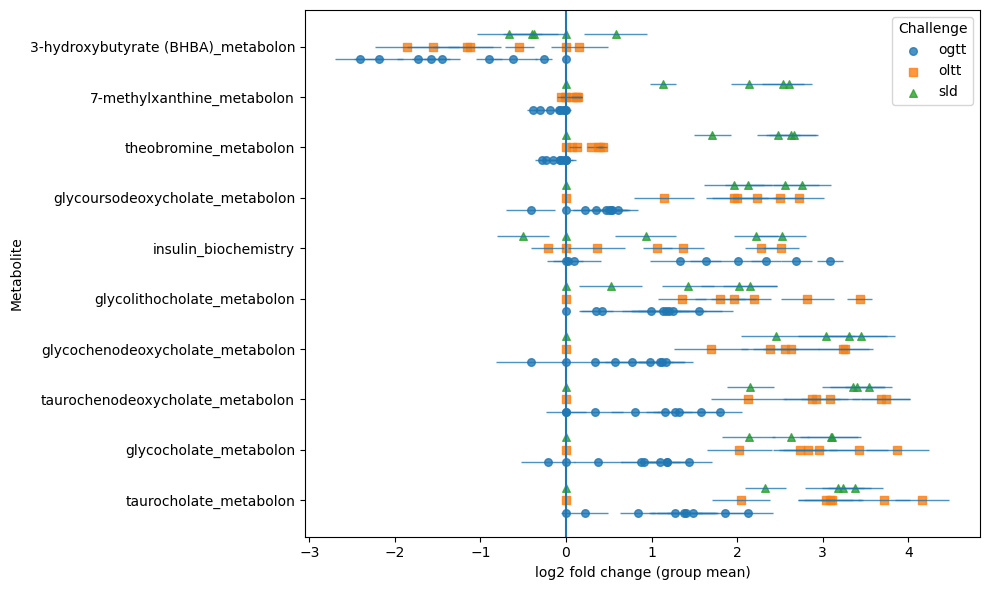

In [143]:
plot_figure2B_topN(
    df_group,
    top_n=10,                 # show only 10 largest
    abs_log2fc_thresh=1.0,    # optional effect size filter
    select_mode="all",        # "all" or "effect"
    sort_by="by_max_abs",     # order metabolites by largest effect
    include_errorbars=True,
    save_path="figure2B_top10.png"
)

# Spectometry and Methods for measuring untargeted metabolites

1. Pull the metabolites out of the blood proteins and cells using methanol.
2. Centrifuges seperates the liquid metabolites from the rest of the solution
3. Divide the extracted metabolites into 4 groups to run different machine set ups (catches more types of molecules)
4. Evaporate methanol using TurboVap and keep the dried samples under nitrogen so it does not oxidize
5. Re-dissolve samples in a liquid that fits each test
6. Run each group through ultra-high performance liquid chromatography to seperate molecules
    - UHPLC is a separation technique that utlizes pressure and material that interacts differently with different molecules
7. Samples are in mass spectrometer to measure mass/charge
    - Methods used were 
        - Reverse-phase UPLC-MS/MS, positive mode (x2 runs)
            - Reverse-phase UPLC:
                - The column is coated with something oily (hydrophobic).
                - “Watery” molecules pass through quickly, while oily molecules stick longer.
                - Good for separating fats, lipids, and other hydrophobic compounds.
            - Positive
                - The mass spectrometer looks for molecules that can easily pick up a positive charge (like adding a proton, H⁺).
                - good for lipids
        - Reverse-phase UPLC-MS/MS, negative mode
            - Negative
                - Now the MS looks for molecules that can lose a proton and carry a negative charge.
                - This is better for acidic compounds (e.g., fatty acids, bile acids, some vitamins).
        - HILIC UPLC-MS/MS, negative mode
                - Hydrophilic Interaction Liquid Chromatography
                - Column is coated with something that likes water (polar).
                - Here, the very watery, polar molecules stick, while less polar ones come out first.
                - good for sugars, amino acids, nucleotides.
    - This variety broadens coverage—some metabolites are only visible under certain conditions (both watery and oily molecules)
8. Mass Spectrometer gently charges molecules so the MS can detect them 
9. To name a peak (retention time- time for molecule to travel through the column and reach the detector, and signal intensity), they matched what the instrument sees to a known library of metabolites, and quanitfy by the area under each peak



# Comparing Targeted vs Untargeted
- Because all of the data was log2 transformed, we can compare the log2 fold change between targeted and untargeted metabolites, NOT the raw values

What does Log2 do?
- compresses large ranges of data
- Fold changes are symmetric --> if a metabolite doubles, the log2 FC is 1, and it is -1 if it is halved

# Clusters


In [144]:
df_group_means = df_group.drop(["median_log2fc", "sem_log2fc"], axis=1)

In [145]:
df_group_means

,challenge,metabolite,challenge_time,mean_log2fc
0,ogtt,"1,5-anhydroglucitol (1,5-AG)_metabolon",0,0.000000
1,ogtt,"1,5-anhydroglucitol (1,5-AG)_metabolon",15,-0.012061
2,ogtt,"1,5-anhydroglucitol (1,5-AG)_metabolon",30,0.005633
3,ogtt,"1,5-anhydroglucitol (1,5-AG)_metabolon",45,0.036285
4,ogtt,"1,5-anhydroglucitol (1,5-AG)_metabolon",60,0.050745
...,...,...,...,...
13330,sld,xanthurenate_metabolon,0,0.000000
13331,sld,xanthurenate_metabolon,60,0.554133
13332,sld,xanthurenate_metabolon,120,0.717444
13333,sld,xanthurenate_metabolon,180,0.518662


Transition to wide. Values are the FC at that time and test for each metabolite

In [146]:
df_wide = df_group_means.pivot_table(
    index=["metabolite", "challenge"],
    columns="challenge_time",
    values="mean_log2fc"
)
df_wide

challenge_time                                    0         15        30   \
metabolite                             challenge                            
1,5-anhydroglucitol (1,5-AG)_metabolon ogtt       0.0 -0.012061  0.005633   
                                       oltt       0.0       NaN  0.036779   
                                       sld        0.0       NaN       NaN   
1,7-dimethylurate_metabolon            ogtt       0.0 -0.068572 -0.069707   
                                       oltt       0.0       NaN -0.127038   
...                                               ...       ...       ...   
xanthosine_metabolon                   oltt       0.0       NaN -0.065765   
                                       sld        0.0       NaN       NaN   
xanthurenate_metabolon                 ogtt       0.0  0.061245  0.008607   
                                       oltt       0.0       NaN  0.171131   
                                       sld        0.0       NaN       NaN   

challenge_time                                         45        60   \
metabolite                             challenge                       
1,5-anhydroglucitol (1,5-AG)_metabolon ogtt       0.036285  0.050745   
                                       oltt            NaN  0.074623   
                                       sld             NaN -0.004167   
1,7-dimethylurate_metabolon            ogtt      -0.155061 -0.254695   
                                       oltt            NaN -0.174326   
...                                                    ...       ...   
xanthosine_metabolon                   oltt            NaN -0.005376   
                                       sld             NaN -0.168900   
xanthurenate_metabolon                 ogtt       0.035755 -0.071332   
                                       oltt            NaN  0.172878   
                                       sld             NaN  0.554133   

challenge_time                                         90        120  \
metabolite                             challenge                       
1,5-anhydroglucitol (1,5-AG)_metabolon ogtt       0.088795  0.062120   
                                       oltt       0.081459  0.121326   
                                       sld             NaN -0.042732   
1,7-dimethylurate_metabolon            ogtt      -0.365699 -0.428299   
                                       oltt      -0.003899 -0.064253   
...                                                    ...       ...   
xanthosine_metabolon                   oltt      -0.297062 -0.275225   
                                       sld             NaN -0.137675   
xanthurenate_metabolon                 ogtt      -0.202275 -0.288054   
                                       oltt       0.320533  0.314841   
                                       sld             NaN  0.717444   

challenge_time                                         180       240  
metabolite                             challenge                      
1,5-anhydroglucitol (1,5-AG)_metabolon ogtt       0.046137  0.069879  
                                       oltt       0.081112  0.073273  
                                       sld       -0.016464 -0.080658  
1,7-dimethylurate_metabolon            ogtt      -0.690825 -0.599344  
                                       oltt      -0.085724 -0.183673  
...                                                    ...       ...  
xanthosine_metabolon                   oltt      -0.505681 -0.145351  
                                       sld       -0.173005 -0.240933  
xanthurenate_metabolon                 ogtt      -0.165079  0.190688  
                                       oltt       0.197065  0.205604  
                                       sld        0.518662  0.187403  

[1905 rows x 9 columns]

In [147]:
# table has NAs because not every metabolite was measured at  every challenge time, so we will just keep 60, 120, 180, and 240
df_wide = df_wide[[0, 60, 120, 180, 240]]
df_wide

challenge_time                                    0         60        120  \
metabolite                             challenge                            
1,5-anhydroglucitol (1,5-AG)_metabolon ogtt       0.0  0.050745  0.062120   
                                       oltt       0.0  0.074623  0.121326   
                                       sld        0.0 -0.004167 -0.042732   
1,7-dimethylurate_metabolon            ogtt       0.0 -0.254695 -0.428299   
                                       oltt       0.0 -0.174326 -0.064253   
...                                               ...       ...       ...   
xanthosine_metabolon                   oltt       0.0 -0.005376 -0.275225   
                                       sld        0.0 -0.168900 -0.137675   
xanthurenate_metabolon                 ogtt       0.0 -0.071332 -0.288054   
                                       oltt       0.0  0.172878  0.314841   
                                       sld        0.0  0.554133  0.717444   

challenge_time                                         180       240  
metabolite                             challenge                      
1,5-anhydroglucitol (1,5-AG)_metabolon ogtt       0.046137  0.069879  
                                       oltt       0.081112  0.073273  
                                       sld       -0.016464 -0.080658  
1,7-dimethylurate_metabolon            ogtt      -0.690825 -0.599344  
                                       oltt      -0.085724 -0.183673  
...                                                    ...       ...  
xanthosine_metabolon                   oltt      -0.505681 -0.145351  
                                       sld       -0.173005 -0.240933  
xanthurenate_metabolon                 ogtt      -0.165079  0.190688  
                                       oltt       0.197065  0.205604  
                                       sld        0.518662  0.187403  

[1905 rows x 5 columns]

Standardize the data to a mean of 0 and std of 1. This way when clustering, it looks for similar patterns (if it spikes to 3 then falls, or spike to .5 and falls, they'll be in the same cluster since they have the same shape)

In [148]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df_wide.values)
X

array([[ 0.        ,  0.05147133,  0.13368225,  0.15732664,  0.18353309],
       [ 0.        ,  0.11351732,  0.2573481 ,  0.2332851 ,  0.19214766],
       [ 0.        , -0.09120918, -0.08532801,  0.02136731, -0.19858754],
       ...,
       [ 0.        , -0.26572908, -0.59774195, -0.30139765,  0.49018923],
       [ 0.        ,  0.36882056,  0.66155163,  0.48511537,  0.52805224],
       [ 0.        ,  1.35946192,  1.50248681,  1.18356559,  0.48185039]])

In [149]:
from sklearn.cluster import KMeans

k = 8  # they used 8 clusters
km = KMeans(n_clusters=k, random_state=42)
labels = km.fit_predict(X)

df_clusters = df_wide.copy()
df_clusters["cluster"] = labels
df_clusters

challenge_time                                      0        60       120  \
metabolite                             challenge                            
1,5-anhydroglucitol (1,5-AG)_metabolon ogtt       0.0  0.050745  0.062120   
                                       oltt       0.0  0.074623  0.121326   
                                       sld        0.0 -0.004167 -0.042732   
1,7-dimethylurate_metabolon            ogtt       0.0 -0.254695 -0.428299   
                                       oltt       0.0 -0.174326 -0.064253   
...                                               ...       ...       ...   
xanthosine_metabolon                   oltt       0.0 -0.005376 -0.275225   
                                       sld        0.0 -0.168900 -0.137675   
xanthurenate_metabolon                 ogtt       0.0 -0.071332 -0.288054   
                                       oltt       0.0  0.172878  0.314841   
                                       sld        0.0  0.554133  0.717444   

challenge_time                                         180       240  cluster  
metabolite                             challenge                               
1,5-anhydroglucitol (1,5-AG)_metabolon ogtt       0.046137  0.069879        0  
                                       oltt       0.081112  0.073273        0  
                                       sld       -0.016464 -0.080658        0  
1,7-dimethylurate_metabolon            ogtt      -0.690825 -0.599344        1  
                                       oltt      -0.085724 -0.183673        3  
...                                                    ...       ...      ...  
xanthosine_metabolon                   oltt      -0.505681 -0.145351        3  
                                       sld       -0.173005 -0.240933        3  
xanthurenate_metabolon                 ogtt      -0.165079  0.190688        0  
                                       oltt       0.197065  0.205604        5  
                                       sld        0.518662  0.187403        7  

[1905 rows x 6 columns]

In [150]:
assignments = df_wide.reset_index()[["metabolite","challenge"]].copy()
assignments["cluster"] = labels
assignments

challenge_time,metabolite,challenge,cluster
0,"1,5-anhydroglucitol (1,5-AG)_metabolon",ogtt,0
1,"1,5-anhydroglucitol (1,5-AG)_metabolon",oltt,0
2,"1,5-anhydroglucitol (1,5-AG)_metabolon",sld,0
3,"1,7-dimethylurate_metabolon",ogtt,1
4,"1,7-dimethylurate_metabolon",oltt,3
...,...,...,...
1900,xanthosine_metabolon,oltt,3
1901,xanthosine_metabolon,sld,3
1902,xanthurenate_metabolon,ogtt,0
1903,xanthurenate_metabolon,oltt,5


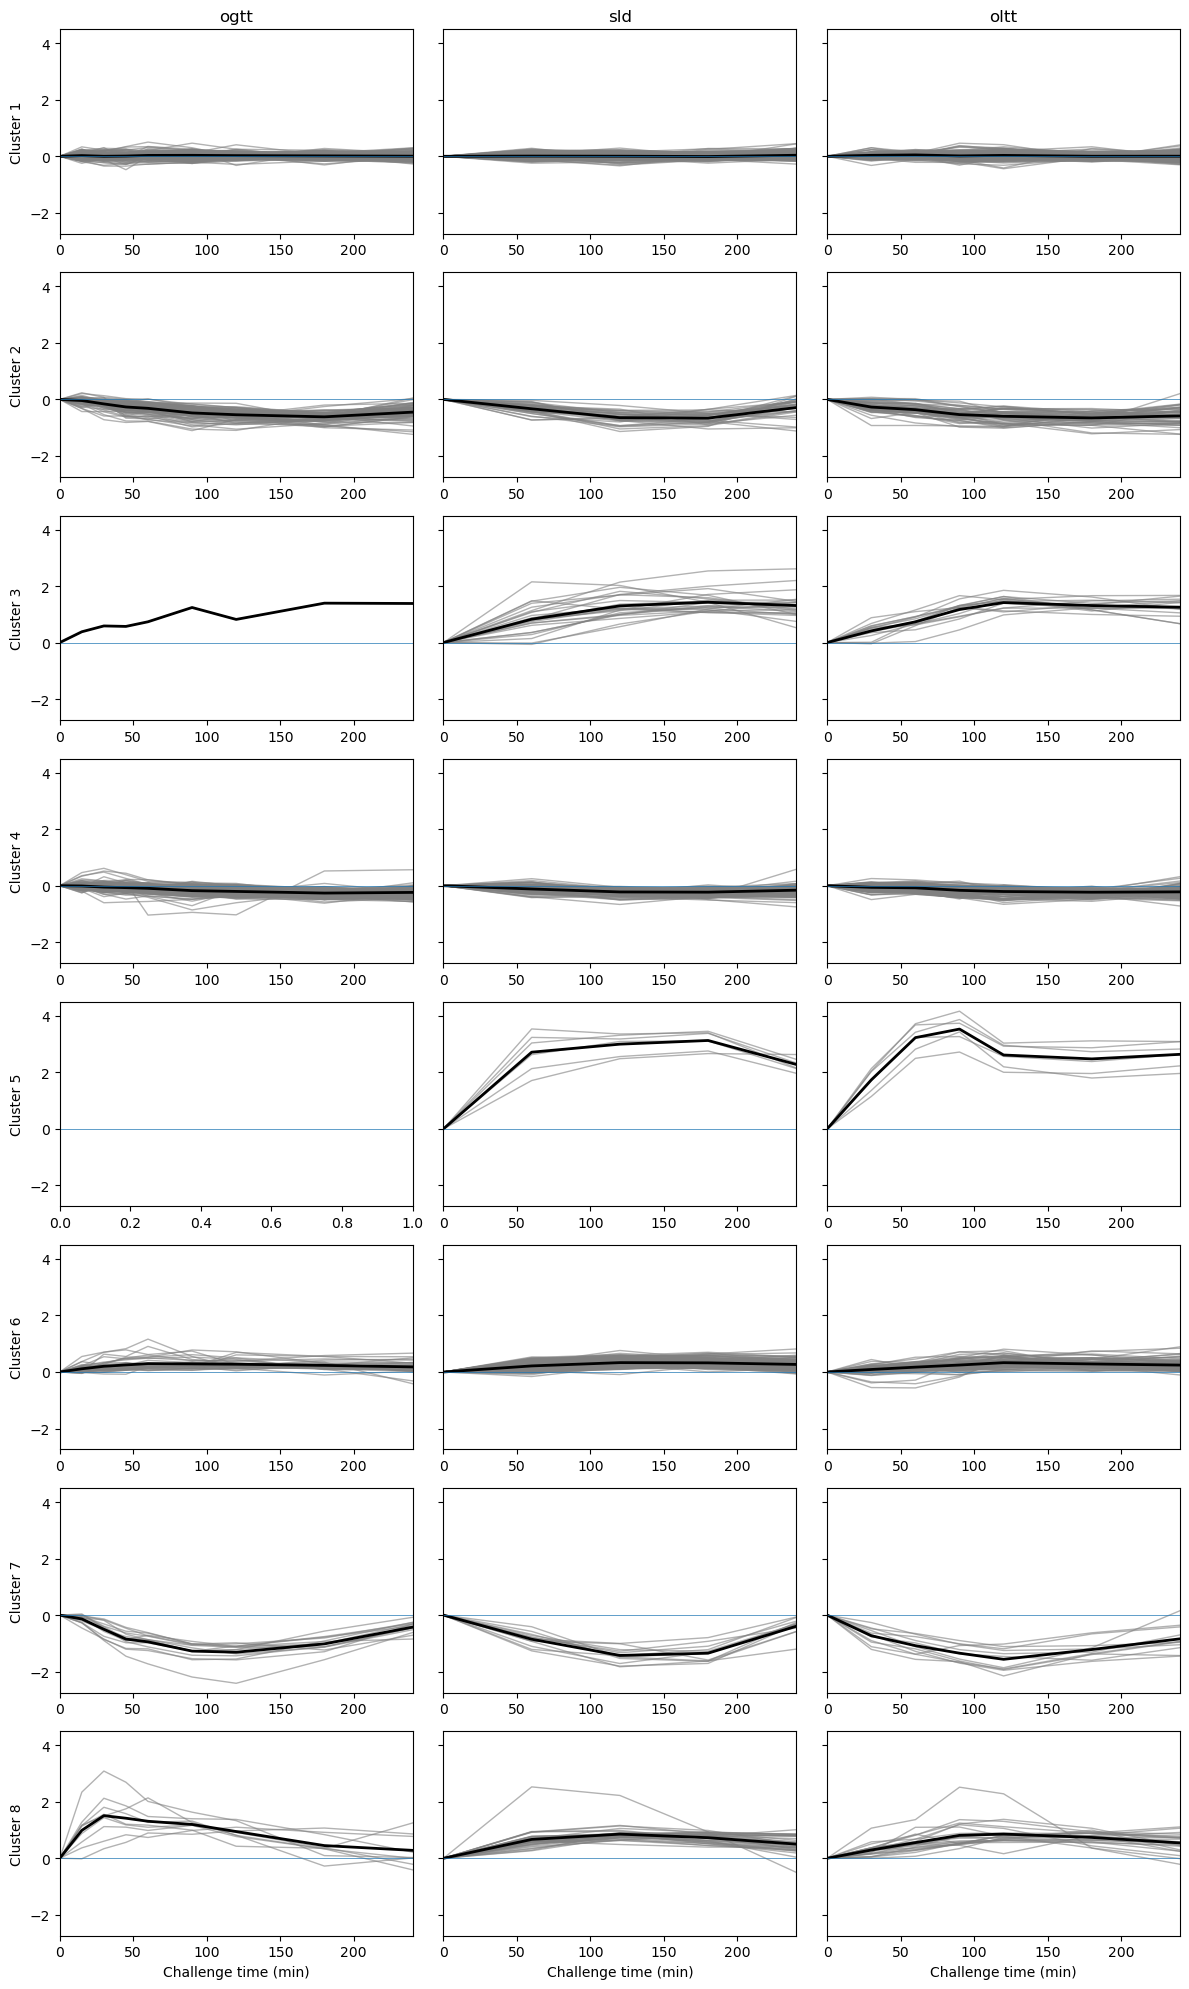

In [151]:
common_times = [0, 60, 120, 180, 240]

challenges = ["ogtt","sld","oltt"]
fig, axes = plt.subplots(k, len(challenges), figsize=(12, 20), sharey=True, sharex=False)

for cl in range(k):
    # which (metabolite, challenge) belong to this cluster?
    members = assignments[assignments["cluster"] == cl]

    for j, ch in enumerate(challenges):
        ax = axes[cl, j]
        mem_ch = members[members["challenge"] == ch]

        # pull the long-format rows for these members to plot gray curves
        if mem_ch.empty:
            ax.set_title(ch if cl == 0 else "")
            if j == 0: ax.set_ylabel(f"Cluster {cl+1}")
            ax.axhline(0, linewidth=0.5)
            continue

        # Each metabolite trajectory for this challenge
        sub = df_group_means[
            (df_group_means["challenge"] == ch) &
            (df_group_means["metabolite"].isin(mem_ch["metabolite"]))
        ].copy()

        # plot each member’s trajectory (gray)
        for met, met_df in sub.groupby("metabolite"):
            m = met_df.sort_values("challenge_time")
            ax.plot(m["challenge_time"], m["mean_log2fc"], color="gray", alpha=0.6, linewidth=1)

        # plot cluster mean (black)
        mean_traj = (sub.groupby("challenge_time")["mean_log2fc"].mean().reset_index())
        mean_traj = mean_traj.sort_values("challenge_time")
        ax.plot(mean_traj["challenge_time"], mean_traj["mean_log2fc"], color="black", linewidth=2)

        # cosmetics
        ax.axhline(0, linewidth=0.5)
        ax.set_xlim(min(common_times), max(common_times))
        if cl == 0:
            ax.set_title(ch)
        if j == 0:
            ax.set_ylabel(f"Cluster {cl+1}")
        if cl == k-1:
            ax.set_xlabel("Challenge time (min)")

fig.tight_layout()
plt.show()


In [152]:
# unique metabolite lists per cluster×challenge
grouped = (assignments
           .groupby(["cluster","challenge"])["metabolite"]
           .unique()
           .reset_index(name="metabolites"))

# explode to one metabolite per row (easy to filter/count/join later)
exploded = grouped.explode("metabolites").rename(columns={"metabolites":"metabolite"})

exploded

,cluster,challenge,metabolite
0,0,ogtt,"1,5-anhydroglucitol (1,5-AG)_metabolon"
0,0,ogtt,1-(1-enyl-oleoyl)-GPC (P-18:1)*_metabolon
0,0,ogtt,1-(1-enyl-oleoyl)-GPE (P-18:1)*_metabolon
0,0,ogtt,1-(1-enyl-palmitoyl)-GPC (P-16:0)*_metabolon
0,0,ogtt,1-(1-enyl-palmitoyl)-GPE (P-16:0)*_metabolon
...,...,...,...
22,7,sld,tyrosine_biocrates
22,7,sld,tyrosine_metabolon
22,7,sld,ursodeoxycholate_metabolon
22,7,sld,valine_biocrates


- clustering (k means time series)
- db,hier., 
- feature selection (PCA, RF, lasso & elastic)
- AUC glucose/insulin


# INsulin and Glucose Responses

In [153]:
# Filter to insulin rows
df_insulin = df_group_means[df_group_means["metabolite"].str.lower() == "insulin_biochemistry"]

# Just in case of multiple spellings (e.g. "Insulin" vs "insulin")
# you could normalize before:
# df_group_means["metabolite"] = df_group_means["metabolite"].str.lower()
df_insulin

,challenge,metabolite,challenge_time,mean_log2fc
4329,ogtt,insulin_biochemistry,0,0.000000
4330,ogtt,insulin_biochemistry,15,2.340099
4331,ogtt,insulin_biochemistry,30,3.085768
4332,ogtt,insulin_biochemistry,45,2.690550
4333,ogtt,insulin_biochemistry,60,2.011781
4334,ogtt,insulin_biochemistry,90,1.630937
4335,ogtt,insulin_biochemistry,120,1.330704
4336,ogtt,insulin_biochemistry,180,0.093819
4337,ogtt,insulin_biochemistry,240,0.027364
9082,oltt,insulin_biochemistry,0,0.000000


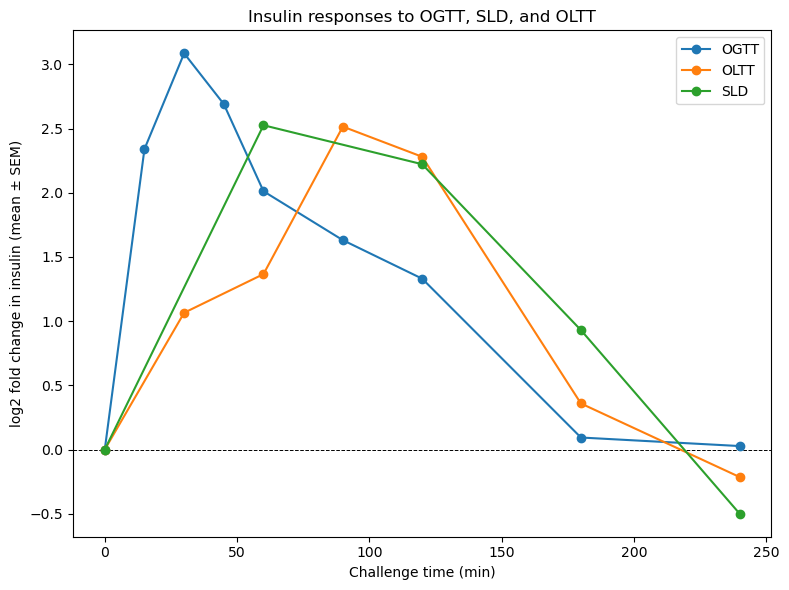

In [154]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for ch, sub in df_insulin.groupby("challenge"):
    sub = sub.sort_values("challenge_time")
    plt.errorbar(
        sub["challenge_time"],
        sub["mean_log2fc"],        # or sub["value"] if you want raw concentration
        yerr=sub.get("sem_log2fc", None),  # if SEM is available
        marker="o", linestyle="-",
        label=ch.upper()
    )

plt.axhline(0, color="black", linestyle="--", linewidth=0.7)
plt.xlabel("Challenge time (min)")
plt.ylabel("log2 fold change in insulin (mean ± SEM)")
plt.title("Insulin responses to OGTT, SLD, and OLTT")
plt.legend()
plt.tight_layout()
plt.show()


Glucose challenge (OGTT) stimulates a strong, immediate insulin secretion, because glucose is absorbed quickly and directly raises blood sugar.

Lipid challenge (OLTT) produces a delayed response, likely due to slower digestion/absorption drive insulin release.

Standard liquid diet (SLD) produces a mixed response (similar to OLTT), reflecting contributions from both carbohydrate and fat metabolism.

In [155]:
df_glucose = df_group_means[df_group_means["metabolite"].str.lower() == "glucose_metabolon"]


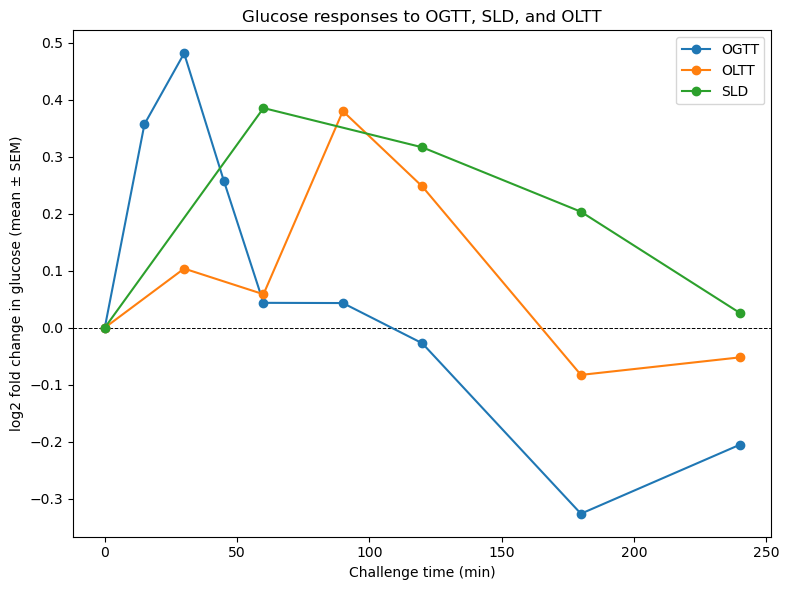

In [156]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for ch, sub in df_glucose.groupby("challenge"):
    sub = sub.sort_values("challenge_time")
    plt.errorbar(
        sub["challenge_time"],
        sub["mean_log2fc"],        # or sub["value"] if you want raw concentration
        yerr=sub.get("sem_log2fc", None),  # if SEM is available
        marker="o", linestyle="-",
        label=ch.upper()
    )

plt.axhline(0, color="black", linestyle="--", linewidth=0.7)
plt.xlabel("Challenge time (min)")
plt.ylabel("log2 fold change in glucose (mean ± SEM)")
plt.title("Glucose responses to OGTT, SLD, and OLTT")
plt.legend()
plt.tight_layout()
plt.show()


# Linear Interpolation

In [157]:
df

,subject,challenge_time,challenge,C10 (decanoylcarnitine)_biocrates,C10:1 (decenoylcarnitine)_biocrates,C12 (dodecanoylcarnitine)_biocrates,C12:1 (dodecenoylcarnitine)_biocrates,C14 (tetradecanoylcarnitine)_biocrates,C14:1 (tetradecenoylcarnitine)_biocrates,C14:1-OH (hydroxytetradecenoylcarnitine)_biocrates,...,piperine_metabolon,quinate_metabolon,S-allylcysteine_metabolon,stachydrine_metabolon,sulfate*_metabolon,tartarate_metabolon,tartronate (hydroxymalonate)_metabolon,theobromine_metabolon,theophylline_metabolon,thymol sulfate_metabolon
0,1,0,ogtt,-2.798868,-3.467533,-4.056491,-4.310432,-5.210897,-4.878321,-7.380822,...,3.877597,0.917394,0.822445,0.572017,0.020769,0.392537,-0.798868,-1.977668,0.765874,0.024462
1,1,15,ogtt,-2.906169,-3.514573,-4.056491,-4.532825,-5.210897,-4.695255,-7.380822,...,3.819842,0.754374,0.772730,0.585924,0.023610,-0.043646,-0.935117,-1.874613,0.383497,0.007339
2,1,30,ogtt,-2.989650,-3.483581,-4.389867,-4.563199,-5.058894,-4.917025,-7.158429,...,3.855133,0.699019,0.657274,0.511873,-0.002455,-0.223980,-1.053194,-1.871443,0.584578,0.015640
3,1,45,ogtt,-3.043349,-3.563199,-4.122805,-4.563199,-5.158429,-5.179188,-7.158429,...,3.912085,0.953452,0.650397,0.531269,0.019061,0.175429,-1.046027,-1.631288,0.598651,-0.044241
4,1,60,ogtt,-3.220278,-3.717857,-4.445362,-4.795859,-5.210897,-5.333516,-6.965784,...,3.846754,0.806943,0.675093,0.510861,-0.037562,0.319734,-1.128472,-1.942307,0.627607,-0.067183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,15,0,sld,-2.068544,-2.934566,-3.317606,-2.661091,-4.832385,-2.846843,-5.952322,...,-1.408512,-0.302404,0.615887,1.498915,-0.022683,-0.349419,0.224534,-3.244685,-0.491470,0.043064
311,15,60,sld,-2.491673,-3.364385,-3.704630,-3.583809,-4.832385,-2.965784,-6.058894,...,-1.248793,-0.400682,0.556405,1.558023,-0.003467,-0.280860,0.204892,-0.278759,-0.759258,-0.263265
312,15,120,sld,-2.537843,-3.392895,-4.115285,-3.622376,-5.137965,-3.171368,-6.300164,...,-1.126266,-0.356606,0.312084,1.533065,-0.077041,-0.136854,0.136979,0.706111,-0.873556,-0.332971
313,15,180,sld,-2.671164,-3.421979,-4.345198,-3.622376,-5.519528,-3.395929,-6.300164,...,-1.012170,-0.406981,0.142609,1.550359,0.129481,0.051163,0.480472,0.872711,-0.827256,-0.476338


In [158]:
# This will show each challenge and the unique times associated with it
result = df.groupby("challenge")["challenge_time"].unique().reset_index()

result

,challenge,challenge_time
0,ogtt,"[0, 15, 30, 45, 60, 90, 120, 180, 240]"
1,oltt,"[0, 30, 60, 90, 120, 180, 240]"
2,sld,"[0, 60, 120, 180, 240]"


In [159]:
# We want to ensure that for each subject and challenge, we have rows for every 15-minute interval from 0 to 240 minutes.
# If any are missing, we will add them with NaNs for the metabolite values.

import numpy as np
import pandas as pd


# 1) Build the full 15-min grid of times.
#    If you know your range is 0..240:
all_times = np.arange(0, 241, 15)



# 2) Make a complete MultiIndex of subject × challenge × time
full_index = pd.MultiIndex.from_product(
    [df["subject"].unique(),
     df["challenge"].unique(),
     all_times],
    names=["subject", "challenge", "challenge_time"]
)

# 3) Reindex to insert the missing 15-min rows (NaNs for all metabolite columns)
df_full = (
    df.set_index(["subject", "challenge", "challenge_time"])
      .reindex(full_index)
      .reset_index()
)

# df_full now has every 15-min row present for each subject×challenge.
# Existing values are preserved; missing ones are NaN (ready for later imputation).


In [160]:
result = df_full.groupby("challenge")["challenge_time"].unique().reset_index()
result

,challenge,challenge_time
0,ogtt,"[0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150..."
1,oltt,"[0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150..."
2,sld,"[0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150..."


In [161]:
df_full

,subject,challenge,challenge_time,C10 (decanoylcarnitine)_biocrates,C10:1 (decenoylcarnitine)_biocrates,C12 (dodecanoylcarnitine)_biocrates,C12:1 (dodecenoylcarnitine)_biocrates,C14 (tetradecanoylcarnitine)_biocrates,C14:1 (tetradecenoylcarnitine)_biocrates,C14:1-OH (hydroxytetradecenoylcarnitine)_biocrates,...,piperine_metabolon,quinate_metabolon,S-allylcysteine_metabolon,stachydrine_metabolon,sulfate*_metabolon,tartarate_metabolon,tartronate (hydroxymalonate)_metabolon,theobromine_metabolon,theophylline_metabolon,thymol sulfate_metabolon
0,1,ogtt,0,-2.798868,-3.467533,-4.056491,-4.310432,-5.210897,-4.878321,-7.380822,...,3.877597,0.917394,0.822445,0.572017,0.020769,0.392537,-0.798868,-1.977668,0.765874,0.024462
1,1,ogtt,15,-2.906169,-3.514573,-4.056491,-4.532825,-5.210897,-4.695255,-7.380822,...,3.819842,0.754374,0.772730,0.585924,0.023610,-0.043646,-0.935117,-1.874613,0.383497,0.007339
2,1,ogtt,30,-2.989650,-3.483581,-4.389867,-4.563199,-5.058894,-4.917025,-7.158429,...,3.855133,0.699019,0.657274,0.511873,-0.002455,-0.223980,-1.053194,-1.871443,0.584578,0.015640
3,1,ogtt,45,-3.043349,-3.563199,-4.122805,-4.563199,-5.158429,-5.179188,-7.158429,...,3.912085,0.953452,0.650397,0.531269,0.019061,0.175429,-1.046027,-1.631288,0.598651,-0.044241
4,1,ogtt,60,-3.220278,-3.717857,-4.445362,-4.795859,-5.210897,-5.333516,-6.965784,...,3.846754,0.806943,0.675093,0.510861,-0.037562,0.319734,-1.128472,-1.942307,0.627607,-0.067183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,15,sld,180,-2.671164,-3.421979,-4.345198,-3.622376,-5.519528,-3.395929,-6.300164,...,-1.012170,-0.406981,0.142609,1.550359,0.129481,0.051163,0.480472,0.872711,-0.827256,-0.476338
761,15,sld,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
762,15,sld,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763,15,sld,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
# Impute new values using interpolation within each subject×challenge×metabolite group

# Identify all metabolite columns automatically (everything not in the id columns)
id_cols = ["subject", "challenge", "challenge_time"]
met_cols = [c for c in df_full.columns if c not in id_cols]

# Sort before interpolation to ensure time order
df_full = df_full.sort_values(id_cols)

# Linear interpolation within each subject×challenge block (per metabolite column)
df_full[met_cols] = (
    df_full
    .groupby(["subject", "challenge"], group_keys=False)[met_cols]
    .apply(lambda g: g.interpolate(method="linear", limit_direction="both"))
)

In [163]:
df_full

,subject,challenge,challenge_time,C10 (decanoylcarnitine)_biocrates,C10:1 (decenoylcarnitine)_biocrates,C12 (dodecanoylcarnitine)_biocrates,C12:1 (dodecenoylcarnitine)_biocrates,C14 (tetradecanoylcarnitine)_biocrates,C14:1 (tetradecenoylcarnitine)_biocrates,C14:1-OH (hydroxytetradecenoylcarnitine)_biocrates,...,piperine_metabolon,quinate_metabolon,S-allylcysteine_metabolon,stachydrine_metabolon,sulfate*_metabolon,tartarate_metabolon,tartronate (hydroxymalonate)_metabolon,theobromine_metabolon,theophylline_metabolon,thymol sulfate_metabolon
0,1,ogtt,0,-2.798868,-3.467533,-4.056491,-4.310432,-5.210897,-4.878321,-7.380822,...,3.877597,0.917394,0.822445,0.572017,0.020769,0.392537,-0.798868,-1.977668,0.765874,0.024462
1,1,ogtt,15,-2.906169,-3.514573,-4.056491,-4.532825,-5.210897,-4.695255,-7.380822,...,3.819842,0.754374,0.772730,0.585924,0.023610,-0.043646,-0.935117,-1.874613,0.383497,0.007339
2,1,ogtt,30,-2.989650,-3.483581,-4.389867,-4.563199,-5.058894,-4.917025,-7.158429,...,3.855133,0.699019,0.657274,0.511873,-0.002455,-0.223980,-1.053194,-1.871443,0.584578,0.015640
3,1,ogtt,45,-3.043349,-3.563199,-4.122805,-4.563199,-5.158429,-5.179188,-7.158429,...,3.912085,0.953452,0.650397,0.531269,0.019061,0.175429,-1.046027,-1.631288,0.598651,-0.044241
4,1,ogtt,60,-3.220278,-3.717857,-4.445362,-4.795859,-5.210897,-5.333516,-6.965784,...,3.846754,0.806943,0.675093,0.510861,-0.037562,0.319734,-1.128472,-1.942307,0.627607,-0.067183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,15,sld,180,-2.671164,-3.421979,-4.345198,-3.622376,-5.519528,-3.395929,-6.300164,...,-1.012170,-0.406981,0.142609,1.550359,0.129481,0.051163,0.480472,0.872711,-0.827256,-0.476338
761,15,sld,195,-2.409300,-3.226098,-4.046579,-3.346871,-5.378845,-3.183929,-6.122462,...,-1.175543,-0.444016,0.191884,1.547677,0.107807,0.187702,0.478606,0.743963,-0.844358,-0.461494
762,15,sld,210,-2.147437,-3.030218,-3.747960,-3.071366,-5.238162,-2.971930,-5.944760,...,-1.338915,-0.481051,0.241158,1.544995,0.086133,0.324240,0.476740,0.615216,-0.861460,-0.446650
763,15,sld,225,-1.885573,-2.834337,-3.449340,-2.795861,-5.097479,-2.759931,-5.767057,...,-1.502288,-0.518086,0.290433,1.542312,0.064459,0.460778,0.474874,0.486468,-0.878562,-0.431806


# AUC Glucose

In [164]:
# AUC metric for glucose (for each subject)

# Select only the relevant columns
interpolated_glucose = df_full[["subject", "challenge", "challenge_time", "glucose_metabolon"]]
interpolated_glucose

,subject,challenge,challenge_time,glucose_metabolon
0,1,ogtt,0,-0.154731
1,1,ogtt,15,0.393526
2,1,ogtt,30,0.508631
3,1,ogtt,45,0.234256
4,1,ogtt,60,0.268554
...,...,...,...,...
760,15,sld,180,-0.241441
761,15,sld,195,-0.229201
762,15,sld,210,-0.216961
763,15,sld,225,-0.204720


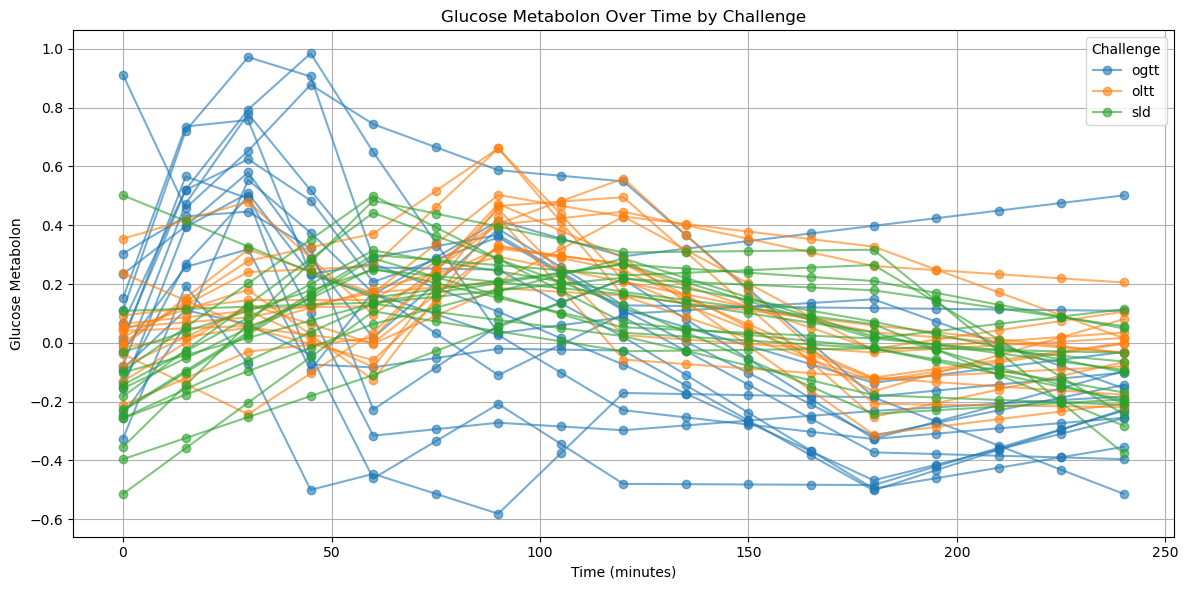

In [165]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Assign one color per challenge
challenges = interpolated_glucose["challenge"].unique()
colors = plt.cm.tab10.colors  # good default color set

for challenge, color in zip(challenges, colors):
    subset = interpolated_glucose[interpolated_glucose["challenge"] == challenge]
    # Plot each subject within this challenge
    for subject, subdata in subset.groupby("subject"):
        plt.plot(
            subdata["challenge_time"],
            subdata["glucose_metabolon"],
            marker="o",
            color=color,
            alpha=0.6,  # makes overlapping lines easier to see
            label=f"{challenge}" if subject == subset["subject"].unique()[0] else ""
        )

plt.title("Glucose Metabolon Over Time by Challenge")
plt.xlabel("Time (minutes)")
plt.ylabel("Glucose Metabolon")
plt.legend(title="Challenge")
plt.grid(True)
plt.tight_layout()
plt.show()

#raw glucose values, not log2fc

In [166]:
import numpy as np

# Calculate AUC for each subject and challenge using trapsz method
# Trapz uses raw data, so if the curve is mostly below baseline, the AUC will be small or negative
auc_df = (
    interpolated_glucose.groupby(["subject", "challenge"])
    .apply(lambda g: np.trapz(g["glucose_metabolon"], g["challenge_time"]))
    .reset_index(name="AUC")
)
auc_df


,subject,challenge,AUC
0,1,ogtt,-13.991802
1,1,oltt,6.512090
2,1,sld,11.883769
3,2,ogtt,-0.260539
4,2,oltt,-1.316608
5,2,sld,44.575345
6,3,ogtt,48.801096
7,3,oltt,27.086739
8,3,sld,26.586566
9,4,ogtt,21.676699


In [167]:
#iAUC metric for glucose (for each subject)
# iAUC is the area above baseline (0 min), ignoring any area below baseline.

import numpy as np

def calc_iauc(g):
    baseline = g.loc[g["challenge_time"] == 0, "glucose_metabolon"].values[0]
    adjusted = g["glucose_metabolon"] - baseline
    adjusted = adjusted.clip(lower=0)  # zero out negative values
    return np.trapz(adjusted, g["challenge_time"])

iauc_df = (
    interpolated_glucose.groupby(["subject", "challenge"])
    .apply(calc_iauc)
    .reset_index(name="iAUC")
)

iauc_df


,subject,challenge,iAUC
0,1,ogtt,43.159484
1,1,oltt,21.289590
2,1,sld,73.450517
3,2,ogtt,49.618229
4,2,oltt,53.136042
5,2,sld,129.662122
6,3,ogtt,11.071266
7,3,oltt,19.648636
8,3,sld,9.648224
9,4,ogtt,40.349895


# Quantify Variation

In [168]:
interpolated_glucose

,subject,challenge,challenge_time,glucose_metabolon
0,1,ogtt,0,-0.154731
1,1,ogtt,15,0.393526
2,1,ogtt,30,0.508631
3,1,ogtt,45,0.234256
4,1,ogtt,60,0.268554
...,...,...,...,...
760,15,sld,180,-0.241441
761,15,sld,195,-0.229201
762,15,sld,210,-0.216961
763,15,sld,225,-0.204720


In [169]:
interpolated_glucose.groupby(["subject", "challenge"])["glucose_metabolon"].std()


subject  challenge
1        ogtt         0.302401
         oltt         0.159827
         sld          0.150706
2        ogtt         0.389775
         oltt         0.244609
         sld          0.276576
3        ogtt         0.142332
         oltt         0.100145
         sld          0.099951
4        ogtt         0.299797
         oltt         0.152947
         sld          0.173051
5        ogtt         0.392104
         oltt         0.111024
         sld          0.106822
6        ogtt         0.199675
         oltt         0.144124
         sld          0.144323
7        ogtt         0.265075
         oltt         0.220966
         sld          0.125664
8        ogtt         0.198257
         oltt         0.168622
         sld          0.155758
9        ogtt         0.351865
         oltt         0.258094
         sld          0.132478
10       ogtt         0.444887
         oltt         0.245641
         sld          0.198476
11       ogtt         0.288224
         oltt       

In [170]:
# group by challenge type (e.g. "ogtt", "sld") and compute std
std_per_test = (
    df.groupby("challenge")["glucose_metabolon"]
      .std()
      .reset_index(name="std_glucose")
)

print(std_per_test)


  challenge  std_glucose
0      ogtt     0.372304
1      oltt     0.213017
2       sld     0.222595


# Models
## PLS

In [171]:
nan_locs = df_full[df_full.isna().any(axis=1)]

# Optionally, show which specific columns are NaN for each row:
nan_positions = df_full.isna()
for row, cols in nan_positions.iterrows():
    if cols.any():
        print(f"Row {row} → NaN in: {list(cols[cols].index)}")


Row 0 → NaN in: ['cis-aconitate_metabolon', 'sebacate (decanedioate)_metabolon']
Row 1 → NaN in: ['cis-aconitate_metabolon', 'sebacate (decanedioate)_metabolon']
Row 2 → NaN in: ['cis-aconitate_metabolon', 'sebacate (decanedioate)_metabolon']
Row 3 → NaN in: ['cis-aconitate_metabolon', 'sebacate (decanedioate)_metabolon']
Row 4 → NaN in: ['cis-aconitate_metabolon', 'sebacate (decanedioate)_metabolon']
Row 5 → NaN in: ['cis-aconitate_metabolon', 'sebacate (decanedioate)_metabolon']
Row 6 → NaN in: ['cis-aconitate_metabolon', 'sebacate (decanedioate)_metabolon']
Row 7 → NaN in: ['cis-aconitate_metabolon', 'sebacate (decanedioate)_metabolon']
Row 8 → NaN in: ['cis-aconitate_metabolon', 'sebacate (decanedioate)_metabolon']
Row 9 → NaN in: ['cis-aconitate_metabolon', 'sebacate (decanedioate)_metabolon']
Row 10 → NaN in: ['cis-aconitate_metabolon', 'sebacate (decanedioate)_metabolon']
Row 11 → NaN in: ['cis-aconitate_metabolon', 'sebacate (decanedioate)_metabolon']
Row 12 → NaN in: ['cis-aco

Row 259 → NaN in: ['cis-aconitate_metabolon']
Row 260 → NaN in: ['cis-aconitate_metabolon']
Row 261 → NaN in: ['cis-aconitate_metabolon']
Row 262 → NaN in: ['cis-aconitate_metabolon']
Row 263 → NaN in: ['cis-aconitate_metabolon']
Row 264 → NaN in: ['cis-aconitate_metabolon']
Row 265 → NaN in: ['cis-aconitate_metabolon']
Row 266 → NaN in: ['cis-aconitate_metabolon']
Row 267 → NaN in: ['cis-aconitate_metabolon']
Row 268 → NaN in: ['cis-aconitate_metabolon']
Row 269 → NaN in: ['cis-aconitate_metabolon']
Row 270 → NaN in: ['cis-aconitate_metabolon']
Row 271 → NaN in: ['cis-aconitate_metabolon']
Row 374 → NaN in: ['4-hydroxychlorothalonil_metabolon', '5-acetylamino-6-amino-3-methyluracil_metabolon']
Row 375 → NaN in: ['4-hydroxychlorothalonil_metabolon', '5-acetylamino-6-amino-3-methyluracil_metabolon']
Row 376 → NaN in: ['4-hydroxychlorothalonil_metabolon', '5-acetylamino-6-amino-3-methyluracil_metabolon']
Row 377 → NaN in: ['4-hydroxychlorothalonil_metabolon', '5-acetylamino-6-amino-3-met

In [172]:
cols_to_view = [
    "subject",
    "challenge",
    "challenge_time",
    "cis-aconitate_metabolon",
    "sebacate (decanedioate)_metabolon",
    "4-hydroxyphenylacetatoylcarnitine_metabolon",
    "phenylacetylcarnitine_metabolon"
]
df_full[cols_to_view].head(30)

,subject,challenge,challenge_time,cis-aconitate_metabolon,sebacate (decanedioate)_metabolon,4-hydroxyphenylacetatoylcarnitine_metabolon,phenylacetylcarnitine_metabolon
0,1,ogtt,0,NaN,NaN,0.241718,-0.374262
1,1,ogtt,15,NaN,NaN,0.480679,0.012497
2,1,ogtt,30,NaN,NaN,0.484190,-0.067636
3,1,ogtt,45,NaN,NaN,0.470719,-0.176577
4,1,ogtt,60,NaN,NaN,0.423955,0.005328
5,1,ogtt,75,NaN,NaN,0.388865,-0.020201
6,1,ogtt,90,NaN,NaN,0.353775,-0.045729
7,1,ogtt,105,NaN,NaN,0.406236,0.017396
8,1,ogtt,120,NaN,NaN,0.458697,0.080521
9,1,ogtt,135,NaN,NaN,0.440836,0.048027


In [173]:
df_full = df_full.fillna(0)


In [174]:
df_full

,subject,challenge,challenge_time,C10 (decanoylcarnitine)_biocrates,C10:1 (decenoylcarnitine)_biocrates,C12 (dodecanoylcarnitine)_biocrates,C12:1 (dodecenoylcarnitine)_biocrates,C14 (tetradecanoylcarnitine)_biocrates,C14:1 (tetradecenoylcarnitine)_biocrates,C14:1-OH (hydroxytetradecenoylcarnitine)_biocrates,...,piperine_metabolon,quinate_metabolon,S-allylcysteine_metabolon,stachydrine_metabolon,sulfate*_metabolon,tartarate_metabolon,tartronate (hydroxymalonate)_metabolon,theobromine_metabolon,theophylline_metabolon,thymol sulfate_metabolon
0,1,ogtt,0,-2.798868,-3.467533,-4.056491,-4.310432,-5.210897,-4.878321,-7.380822,...,3.877597,0.917394,0.822445,0.572017,0.020769,0.392537,-0.798868,-1.977668,0.765874,0.024462
1,1,ogtt,15,-2.906169,-3.514573,-4.056491,-4.532825,-5.210897,-4.695255,-7.380822,...,3.819842,0.754374,0.772730,0.585924,0.023610,-0.043646,-0.935117,-1.874613,0.383497,0.007339
2,1,ogtt,30,-2.989650,-3.483581,-4.389867,-4.563199,-5.058894,-4.917025,-7.158429,...,3.855133,0.699019,0.657274,0.511873,-0.002455,-0.223980,-1.053194,-1.871443,0.584578,0.015640
3,1,ogtt,45,-3.043349,-3.563199,-4.122805,-4.563199,-5.158429,-5.179188,-7.158429,...,3.912085,0.953452,0.650397,0.531269,0.019061,0.175429,-1.046027,-1.631288,0.598651,-0.044241
4,1,ogtt,60,-3.220278,-3.717857,-4.445362,-4.795859,-5.210897,-5.333516,-6.965784,...,3.846754,0.806943,0.675093,0.510861,-0.037562,0.319734,-1.128472,-1.942307,0.627607,-0.067183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,15,sld,180,-2.671164,-3.421979,-4.345198,-3.622376,-5.519528,-3.395929,-6.300164,...,-1.012170,-0.406981,0.142609,1.550359,0.129481,0.051163,0.480472,0.872711,-0.827256,-0.476338
761,15,sld,195,-2.409300,-3.226098,-4.046579,-3.346871,-5.378845,-3.183929,-6.122462,...,-1.175543,-0.444016,0.191884,1.547677,0.107807,0.187702,0.478606,0.743963,-0.844358,-0.461494
762,15,sld,210,-2.147437,-3.030218,-3.747960,-3.071366,-5.238162,-2.971930,-5.944760,...,-1.338915,-0.481051,0.241158,1.544995,0.086133,0.324240,0.476740,0.615216,-0.861460,-0.446650
763,15,sld,225,-1.885573,-2.834337,-3.449340,-2.795861,-5.097479,-2.759931,-5.767057,...,-1.502288,-0.518086,0.290433,1.542312,0.064459,0.460778,0.474874,0.486468,-0.878562,-0.431806


In [175]:
#make a PLS model to predict glucose from other metabolites and test type
df_full
# Define X and y
y = df_full["glucose_metabolon"]

# Drop the target
X = df_full.drop(columns=["glucose_metabolon"])

### PLS
Works by compressing all your predictor variables (metabolite concentrations, time, etc.) into a few latent components — these are new variables that summarize the most important information shared between X (inputs) and Y (glucose).

PLS finds hidden combinations of metabolites and variables that best explain glucose variation. It’s useful when many metabolites change together after meals.

In [176]:
# One-hot encode the 'challenge' categorical variable
X = pd.get_dummies(X, columns=["challenge"], drop_first=True)


In [177]:
# Keep only features (drop 'subject' column)
features = X.drop(columns=["subject"])  # keep metabolites + time + encoded challenge


In [178]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
# X_scaled is now ready for modeling


In [179]:
X_scaled

array([[-1.63299316, -0.45783479, -0.13131669, ...,  0.02513108,
        -0.70710678, -0.70710678],
       [-1.42886902, -0.65665005, -0.22870821, ...,  0.01281685,
        -0.70710678, -0.70710678],
       [-1.22474487, -0.81132813, -0.16454249, ...,  0.01878698,
        -0.70710678, -0.70710678],
       ...,
       [ 1.22474487,  0.74918135,  0.77410561, ..., -0.31368519,
        -0.70710678,  1.41421356],
       [ 1.42886902,  1.23437967,  1.17965875, ..., -0.30300973,
        -0.70710678,  1.41421356],
       [ 1.63299316,  1.71957798,  1.58521189, ..., -0.29233428,
        -0.70710678,  1.41421356]])

In [180]:
# PLS modeling
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Fit model
pls = PLSRegression(n_components=5)
pls.fit(X_train, y_train)

# Evaluate
y_pred = pls.predict(X_test)
print("R² (test):", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



R² (test): 0.8062933496048597
RMSE: 0.11648251841893403


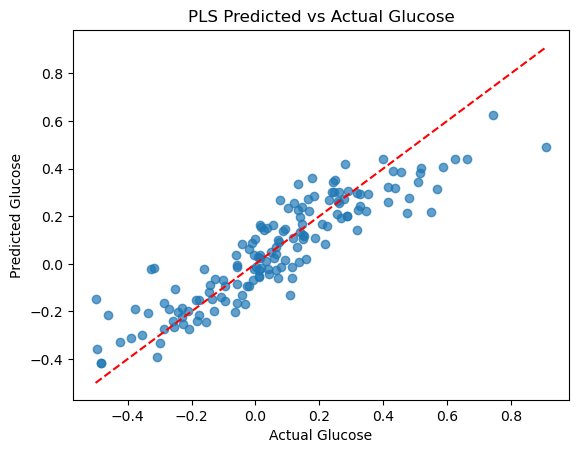

In [181]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Glucose")
plt.ylabel("Predicted Glucose")
plt.title("PLS Predicted vs Actual Glucose")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()


In [182]:
import numpy as np
import pandas as pd

feature_names = features.columns
coef = pls.coef_.ravel()                 # shape (p,)
coef_importance = pd.Series(np.abs(coef), index=feature_names).sort_values(ascending=False)
coef_importance.head(15)


H1 (hexose)_biocrates                                       0.029018
gluconate_metabolon                                         0.021026
insulin_biochemistry                                        0.017890
mannose_metabolon                                           0.014098
fructose_metabolon                                          0.011736
7-alpha-hydroxy-3-oxo-4-cholestenoate (7-Hoca)_metabolon    0.011216
N-acetylserine_metabolon                                    0.010605
glutamate_metabolon                                         0.009214
adenosine 3',5'-cyclic monophosphate (cAMP)_metabolon       0.009106
palmitoylcholine_metabolon                                  0.008636
challenge_time                                              0.008330
trans-urocanate_metabolon                                   0.008265
phosphoethanolamine_metabolon                               0.008246
methylsuccinate_metabolon                                   0.007708
erythronate*_metabolon            

## Lasso

### Explanantion
LASSO is a linear regression with L1 regularization, which means it adds a penalty proportional to the absolute value of each coefficient.

Drives some coefficients exactly to zero (variable selection). Extra variable have an associated "cost"

Can be unstable when predictors are highly correlated

In [183]:
from sklearn.linear_model import LassoCV
import numpy as np
import pandas as pd

# cross-validated LASSO
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
print("R²:", r2_score(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

R²: 0.9537245986582648
RMSE: 0.05693293631663685


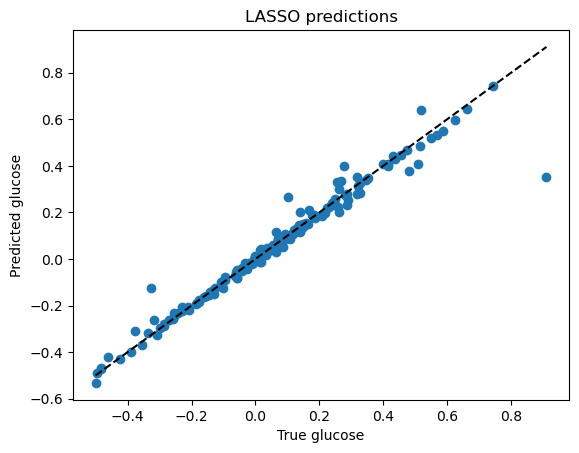

In [184]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_lasso)
plt.xlabel("True glucose")
plt.ylabel("Predicted glucose")
plt.title("LASSO predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()


In [185]:
# Feature importance from LASSO
feature_names = features.columns
coef = lasso.coef_               
coef_importance = pd.Series(np.abs(coef), index=feature_names).sort_values(ascending=False)
coef_importance.head(15)

H1 (hexose)_biocrates                                 0.207062
PC ae C40:5_biocrates                                 0.035414
lysoPC a C16:1_biocrates                              0.033720
C8 (octanoylcarnitine)_biocrates                      0.029800
N-acetylneuraminate_metabolon                         0.029231
glycerate_metabolon                                   0.028661
histidine_biocrates                                   0.028214
5-acetylamino-6-amino-3-methyluracil_metabolon        0.026657
PC ae C36:2_biocrates                                 0.025524
C14:1-OH (hydroxytetradecenoylcarnitine)_biocrates    0.024371
PC ae C38:5_biocrates                                 0.023346
1-(1-enyl-oleoyl)-GPE (P-18:1)*_metabolon             0.022587
mannose_metabolon                                     0.022466
pyridoxate_metabolon                                  0.021163
pantothenate_metabolon                                0.020981
dtype: float64

## Elastic Net

### Explanantion
Elastic Net combines LASSO (L1) and Ridge (L2) regularization. L2 shrinks toward zero, keeping predictors but making them smaller to precent overfitting

Elastic Net balances between keeping important metabolites and stabilizing predictions when multiple metabolites are correlated

In [186]:
from sklearn.linear_model import ElasticNetCV

elastic = ElasticNetCV(
    cv=5, l1_ratio=[.1, .5, .7, .9, .95, .99, 1],  # grid over L1/L2 balance
    random_state=42
)
elastic.fit(X_train, y_train)
y_pred_en = elastic.predict(X_test)
print("R²:", r2_score(y_test, y_pred_en))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_en)))


coef_en = pd.Series(elastic.coef_, index=features.columns)
important_en = coef_en[coef_en != 0].sort_values(key=abs, ascending=False)
important_en.head(20)


R²: 0.9537245986582648
RMSE: 0.05693293631663685


H1 (hexose)_biocrates                                 0.207062
PC ae C40:5_biocrates                                -0.035414
lysoPC a C16:1_biocrates                             -0.033720
C8 (octanoylcarnitine)_biocrates                     -0.029800
N-acetylneuraminate_metabolon                         0.029231
glycerate_metabolon                                   0.028661
histidine_biocrates                                  -0.028214
5-acetylamino-6-amino-3-methyluracil_metabolon        0.026657
PC ae C36:2_biocrates                                -0.025524
C14:1-OH (hydroxytetradecenoylcarnitine)_biocrates   -0.024371
PC ae C38:5_biocrates                                -0.023346
1-(1-enyl-oleoyl)-GPE (P-18:1)*_metabolon            -0.022587
mannose_metabolon                                     0.022466
pyridoxate_metabolon                                  0.021163
pantothenate_metabolon                               -0.020981
choline_metabolon                                     0

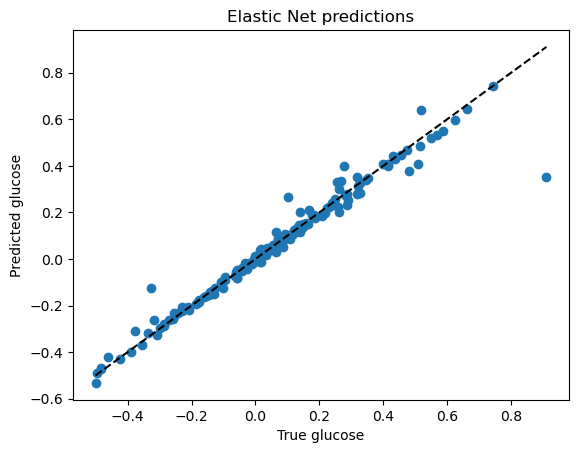

In [187]:
plt.scatter(y_test, y_pred_en)
plt.xlabel("True glucose")
plt.ylabel("Predicted glucose")
plt.title("Elastic Net predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()


In [188]:
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np

results = {
    "Model": ["PLS", "LASSO", "Elastic Net"],
    "R² (train)": [
        pls.score(X_train, y_train),
        lasso.score(X_train, y_train),
        elastic.score(X_train, y_train),
    ],
    "R² (test)": [
        r2_score(y_test, y_pred),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_en),
    ],
    "RMSE (test)": [
        np.sqrt(mean_squared_error(y_test, y_pred)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
        np.sqrt(mean_squared_error(y_test, y_pred_en)),
    ],
}
results_df = pd.DataFrame(results)
print(results_df.round(4))


         Model  R² (train)  R² (test)  RMSE (test)
0          PLS      0.8496     0.8063       0.1165
1        LASSO      0.9959     0.9537       0.0569
2  Elastic Net      0.9959     0.9537       0.0569


## Explaining the Results

R² measures how well the model explains variation in glucose levels across the dataset.

An R² of 0.78 on test data, means that your model explains 78% of the variability in glucose that occurs due to meals, metabolites, and timing.

RMSE tells the average prediction error in glucose units (how far off your model’s predicted glucose is from the actual value)

# Models (again) with AUC as single predictors

## PLS

In [189]:
# same model as above, but with cross validation and using each metabolites AUC/iAUC as features instead of time series

In [190]:
import pandas as pd
import numpy as np

# Identify meta columns
meta_cols = ["subject", "challenge", "challenge_time"]
metabolites = df_full.drop(columns=meta_cols)

def compute_incremental_auc(group):
    group = group.sort_values("challenge_time")
    times = group["challenge_time"].values
    
    auc_dict = {}
    for col in metabolites.columns:
        vals = group[col].values
        baseline = vals[0]  # assume first timepoint is baseline (t=0)
        deltas = vals - baseline
        
        # keep only positive increments (area above baseline)
        deltas_pos = np.maximum(deltas, 0)
        
        # trapezoidal integration of positive increments only
        auc = np.trapz(deltas_pos, times)
        auc_dict[col] = auc
    return pd.Series(auc_dict)

# Apply to each subject × challenge
df_iAUC = (
    df_full.groupby(["subject", "challenge"])
    .apply(compute_incremental_auc)
    .reset_index()
)

df_iAUC.head()


,subject,challenge,C10 (decanoylcarnitine)_biocrates,C10:1 (decenoylcarnitine)_biocrates,C12 (dodecanoylcarnitine)_biocrates,C12:1 (dodecenoylcarnitine)_biocrates,C14 (tetradecanoylcarnitine)_biocrates,C14:1 (tetradecenoylcarnitine)_biocrates,C14:1-OH (hydroxytetradecenoylcarnitine)_biocrates,C14:2 (tetradecadienylcarnitine)_biocrates,...,piperine_metabolon,quinate_metabolon,S-allylcysteine_metabolon,stachydrine_metabolon,sulfate*_metabolon,tartarate_metabolon,tartronate (hydroxymalonate)_metabolon,theobromine_metabolon,theophylline_metabolon,thymol sulfate_metabolon
0,1,ogtt,3.069686,0.000000,0.000000,0.000000,7.914246,3.059643,64.263571,4.487954,...,14.112684,12.807926,0.0,0.208612,0.042620,0.000000,17.296607,22.040056,0.000000,0.000000
1,1,oltt,0.068861,4.036534,0.846322,0.254373,28.283956,0.675506,2.778124,15.160518,...,2.536265,0.000000,0.0,7.776738,42.938081,67.780500,14.477145,59.972629,25.597555,7.572372
2,1,sld,14.885466,18.952849,7.966398,39.859915,4.453307,23.830248,0.000000,30.665542,...,0.000000,4.864022,0.0,0.531730,12.978036,50.719692,45.316983,401.289469,2.387584,0.000000
3,2,ogtt,13.725543,5.040399,3.037457,20.899298,1.361145,1.382725,18.525599,1.972758,...,16.053018,0.000000,0.0,0.000000,1.170470,117.573533,33.858046,9.913056,0.000000,0.000000
4,2,oltt,26.826063,33.447525,20.414084,14.183474,2.810563,27.719215,41.304692,61.520415,...,0.553047,149.325627,0.0,0.000000,7.768331,29.299590,26.285728,78.718882,57.102435,6.217730


In [191]:
# add cluster as a feature
# Merge cluster assignments into iAUC dataframe
# Let's reshape df_iAUC to have a metabolite column first
df_iAUC_long = df_iAUC.melt(
    id_vars=["subject", "challenge"],
    var_name="metabolite",
    value_name="iAUC"
)
df_iAUC_long


,subject,challenge,metabolite,iAUC
0,1,ogtt,C10 (decanoylcarnitine)_biocrates,3.069686
1,1,oltt,C10 (decanoylcarnitine)_biocrates,0.068861
2,1,sld,C10 (decanoylcarnitine)_biocrates,14.885466
3,2,ogtt,C10 (decanoylcarnitine)_biocrates,13.725543
4,2,oltt,C10 (decanoylcarnitine)_biocrates,26.826063
...,...,...,...,...
28570,14,oltt,thymol sulfate_metabolon,0.000000
28571,14,sld,thymol sulfate_metabolon,0.000000
28572,15,ogtt,thymol sulfate_metabolon,13.587184
28573,15,oltt,thymol sulfate_metabolon,0.000000


In [192]:
#merge with cluster assignments
df_iAUC_merged = df_iAUC_long.merge(
    assignments,
    on=["metabolite", "challenge"],
    how="left"
)
df_iAUC_merged

,subject,challenge,metabolite,iAUC,cluster
0,1,ogtt,C10 (decanoylcarnitine)_biocrates,3.069686,1
1,1,oltt,C10 (decanoylcarnitine)_biocrates,0.068861,3
2,1,sld,C10 (decanoylcarnitine)_biocrates,14.885466,1
3,2,ogtt,C10 (decanoylcarnitine)_biocrates,13.725543,1
4,2,oltt,C10 (decanoylcarnitine)_biocrates,26.826063,3
...,...,...,...,...,...
28570,14,oltt,thymol sulfate_metabolon,0.000000,3
28571,14,sld,thymol sulfate_metabolon,0.000000,1
28572,15,ogtt,thymol sulfate_metabolon,13.587184,3
28573,15,oltt,thymol sulfate_metabolon,0.000000,3


In [193]:
#come back to this later, issues with clusters and metabolites





In [194]:
#use the iAUC values to predict glucose
#flip back to wide format for modeling
df_iAUC_wide = df_iAUC_long.pivot_table(
    index=["subject", "challenge"],
    columns="metabolite",
    values="iAUC"
).reset_index()


In [195]:
df_iAUC_wide

metabolite,subject,challenge,"1,5-anhydroglucitol (1,5-AG)_metabolon","1,7-dimethylurate_metabolon",1-(1-enyl-oleoyl)-GPC (P-18:1)*_metabolon,1-(1-enyl-oleoyl)-GPE (P-18:1)*_metabolon,1-(1-enyl-palmitoyl)-GPC (P-16:0)*_metabolon,1-(1-enyl-palmitoyl)-GPE (P-16:0)*_metabolon,1-(1-enyl-stearoyl)-GPC (P-18:0) *_metabolon,1-(1-enyl-stearoyl)-GPE (P-18:0)*_metabolon,...,urate_metabolon,urea_metabolon,uridine_metabolon,ursodeoxycholate_metabolon,valine_biocrates,valine_metabolon,vanillylmandelate (VMA)_metabolon,xanthine_metabolon,xanthosine_metabolon,xanthurenate_metabolon
0,1,ogtt,14.397624,1.411033,17.283584,11.120796,35.116669,54.193379,30.907755,6.597155,...,4.819304,0.000000,10.710016,2.964913,0.458490,3.295806,6.423749,0.000000,5.404674,2.726018
1,1,oltt,37.569452,13.485350,20.517744,12.925965,20.471514,40.247933,8.465267,13.038282,...,7.742418,21.368053,4.933671,176.654176,6.632108,20.610121,64.092494,0.000000,38.412511,7.227919
2,1,sld,0.000000,73.270012,19.813622,0.000000,5.288518,5.182145,11.902651,0.000000,...,0.000000,3.683503,0.000000,23.559889,105.754273,69.673896,39.829462,0.000000,0.000000,27.810898
3,2,ogtt,18.199440,0.000000,71.814676,80.183211,24.906973,24.075249,0.452694,73.968223,...,0.015855,0.276228,2.252788,0.000000,0.000000,0.000000,2.708701,12.195684,0.000000,18.659411
4,2,oltt,23.922190,91.721129,1.672507,0.000000,0.000000,12.004290,10.360896,0.000000,...,12.353087,32.297664,2.901550,0.443736,27.435523,73.753993,18.204033,0.000000,122.389708,19.653530
5,2,sld,4.671952,27.202591,2.140632,3.289005,3.132293,0.000000,5.090044,0.000000,...,0.000000,24.008606,2.101276,0.000000,145.234968,125.771138,10.727274,9.129194,0.000000,75.470579
6,3,ogtt,9.389692,3.675328,53.065999,2.353071,40.227874,45.472175,56.969400,2.794889,...,3.798183,1.236330,27.559010,0.000000,0.000000,5.830270,23.140226,0.000000,41.736351,62.805426
7,3,oltt,30.833122,75.508011,16.627562,0.000000,15.425190,8.059396,7.369656,0.000000,...,21.354360,31.511123,5.137650,359.461224,10.213397,104.015798,114.632637,0.000000,39.733934,123.241042
8,3,sld,4.764381,23.285311,5.067131,1.581890,8.403844,34.315925,35.663651,8.637199,...,2.819835,17.361441,0.000000,99.784659,68.026882,123.273900,33.182946,12.114129,0.000000,172.170267
9,4,ogtt,21.227933,0.112797,74.721509,58.268885,29.864599,18.991109,29.988531,47.023554,...,7.232863,0.000000,11.764535,10.680276,0.000000,3.210725,51.698423,0.000000,26.272778,27.525656


In [196]:
df_iAUC_wide

y = df_iAUC_wide["glucose_metabolon"]

# Drop the target
X = df_iAUC_wide.drop(columns=["glucose_metabolon", "subject"])

In [197]:
#get rid of the metabolite index
X.columns.name = None


In [198]:
X = pd.get_dummies(X, columns=["challenge"], drop_first=True)


In [199]:
#scaler
X_scaled = scaler.fit_transform(X)
# X_scaled is now ready for modeling


In [200]:
#train /test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# PLS modeling with cross-validation and n_components
from sklearn.model_selection import cross_val_score, KFold
from sklearn.cross_decomposition import PLSRegression
import numpy as np

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Try several numbers of components
n_components_list = range(1, 11)
scores = []

for n in n_components_list:
    pls_auc = PLSRegression(n_components=n)
    # Use R² as the scoring metric
    score = cross_val_score(pls_auc, X_train, y_train, cv=cv, scoring='r2').mean()
    scores.append(score)
    print(f"n_components={n}, Mean CV R²={score:.3f}")

# Choose the best number of components
best_n = n_components_list[np.argmax(scores)]
print(f"\nBest number of components: {best_n}")

# Refit the best model on the full training data
pls_best = PLSRegression(n_components=best_n)
pls_best.fit(X_train, y_train)





n_components=1, Mean CV R²=0.386
n_components=2, Mean CV R²=0.319
n_components=3, Mean CV R²=0.356
n_components=4, Mean CV R²=0.472
n_components=5, Mean CV R²=0.446
n_components=6, Mean CV R²=0.459
n_components=7, Mean CV R²=0.470
n_components=8, Mean CV R²=0.471
n_components=9, Mean CV R²=0.474
n_components=10, Mean CV R²=0.474

Best number of components: 10


PLSRegression(n_components=10)

In [201]:
#evaluate
y_pred = pls_best.predict(X_test)
print("R² (test):", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



R² (test): -2.250185539749649
RMSE: 34.21267152882177


In [202]:
y_hat_q  = np.ravel(y_pred)                         # -> (n,)
y_true_q = np.ravel(y_test) 

PRESS = np.sum((y_true_q - y_hat_q)**2)
SSY   = np.sum((y_true_q - y_true_q.mean())**2)
q2_test = 1 - PRESS/SSY
print(f"Q² (test): {q2_test:.3f}")


Q² (test): -2.250


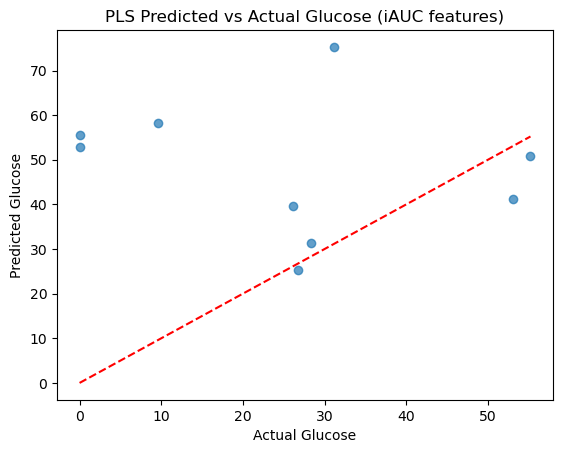

In [203]:
# plot the predicted vs actual
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Glucose")
plt.ylabel("Predicted Glucose")
plt.title("PLS Predicted vs Actual Glucose (iAUC features)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.show()

In [204]:
# extract most important features from model

feature_names = X.columns
coef = pls_best.coef_.ravel()                 # shape (p,)
coef_importance = pd.Series(np.abs(coef), index=feature_names).sort_values(ascending=False)
coef_importance.head(15)


H1 (hexose)_biocrates                                            1.019816
erythritol_metabolon                                             0.987861
pregnanolone/allopregnanolone sulfate_metabolon                  0.940770
gluconate_metabolon                                              0.907643
xanthine_metabolon                                               0.897346
mannose_metabolon                                                0.840388
hypoxanthine_metabolon                                           0.830469
insulin_biochemistry                                             0.815448
p-cresol-glucuronide*_metabolon                                  0.759627
N-acetyl-aspartyl-glutamate (NAAG)_metabolon                     0.732123
methylsuccinoylcarnitine (1)_metabolon                           0.729088
5alpha-androstan-3alpha,17beta-diol monosulfate (2)_metabolon    0.716795
lactate_metabolon                                                0.706113
octadecanedioate_metabolon            

## LASSO


In [205]:
# Same Lasso model, but using the new iAUC features
from sklearn.linear_model import LassoCV
# cross-validated LASSO
lasso_auc = LassoCV(cv=5, random_state=42)
lasso_auc.fit(X_train, y_train)
y_pred_lasso = lasso_auc.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error
print("R²:", r2_score(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

R²: -1.114972092091262
RMSE: 27.59848430260053


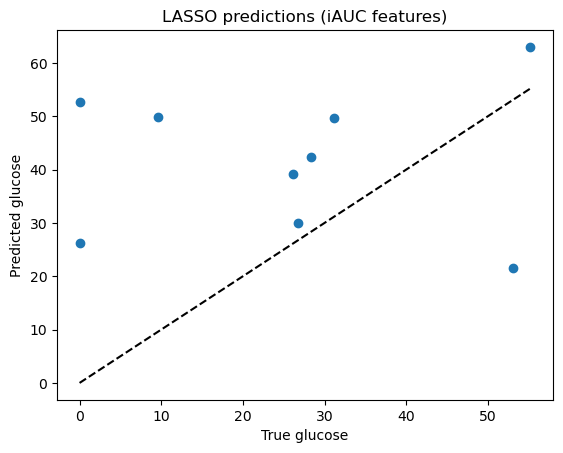

In [206]:
# Plot predictions
plt.scatter(y_test, y_pred_lasso)
plt.xlabel("True glucose")
plt.ylabel("Predicted glucose")
plt.title("LASSO predictions (iAUC features)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max
()], 'k--')
plt.show()

In [207]:
# Feature importance from LASSO
feature_names = X.columns
coef = lasso_auc.coef_
coef_importance_lasso = pd.Series(np.abs(coef), index=feature_names).sort_values(ascending=False)
coef_importance_lasso.head(15)

H1 (hexose)_biocrates                                              10.453564
erythritol_metabolon                                                4.060392
xanthine_metabolon                                                  3.727214
mannose_metabolon                                                   3.564906
SM (OH) C22:2_biocrates                                             3.047400
insulin_biochemistry                                                2.920986
5alpha-pregnan-3(alpha or beta),20beta-diol disulfate_metabolon     2.761967
methylsuccinoylcarnitine (1)_metabolon                              2.614562
N-acetyl-aspartyl-glutamate (NAAG)_metabolon                        2.284982
1-methylnicotinamide_metabolon                                      2.276103
C14:1-OH (hydroxytetradecenoylcarnitine)_biocrates                  2.239733
pregnanolone/allopregnanolone sulfate_metabolon                     2.108603
alpha-ketobutyrate_metabolon                                        2.104680

In [208]:
# Elastic Net with iAUC features
from sklearn.linear_model import ElasticNetCV
elastic_auc = ElasticNetCV(
    cv=5, l1_ratio=[.1, .5, .7, .9, .95, .99, 1],  # grid over L1/L2 balance
    random_state=42
)
elastic_auc.fit(X_train, y_train)
y_pred_en = elastic_auc.predict(X_test)
print("R²:", r2_score(y_test, y_pred_en))   
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_en)))


R²: -1.114972092091262
RMSE: 27.59848430260053


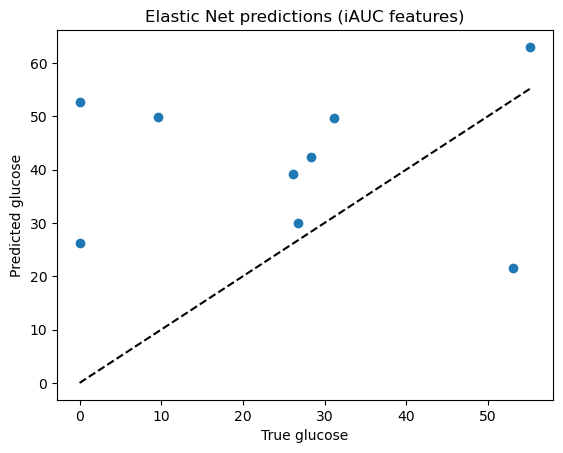

In [209]:
# plot predictions vs actual
plt.scatter(y_test, y_pred_en)
plt.xlabel("True glucose")
plt.ylabel("Predicted glucose")
plt.title("Elastic Net predictions (iAUC features)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

In [210]:
# feature importance from Elastic Net
coef_en = pd.Series(elastic_auc.coef_, index=X.columns)
important_en = coef_en[coef_en != 0].sort_values(key=abs, ascending=False)
important_en.head(15)

H1 (hexose)_biocrates                                              10.453564
erythritol_metabolon                                               -4.060392
xanthine_metabolon                                                  3.727214
mannose_metabolon                                                   3.564906
SM (OH) C22:2_biocrates                                            -3.047400
insulin_biochemistry                                                2.920986
5alpha-pregnan-3(alpha or beta),20beta-diol disulfate_metabolon    -2.761967
methylsuccinoylcarnitine (1)_metabolon                             -2.614562
N-acetyl-aspartyl-glutamate (NAAG)_metabolon                       -2.284982
1-methylnicotinamide_metabolon                                     -2.276103
C14:1-OH (hydroxytetradecenoylcarnitine)_biocrates                 -2.239733
pregnanolone/allopregnanolone sulfate_metabolon                     2.108603
alpha-ketobutyrate_metabolon                                        2.104680

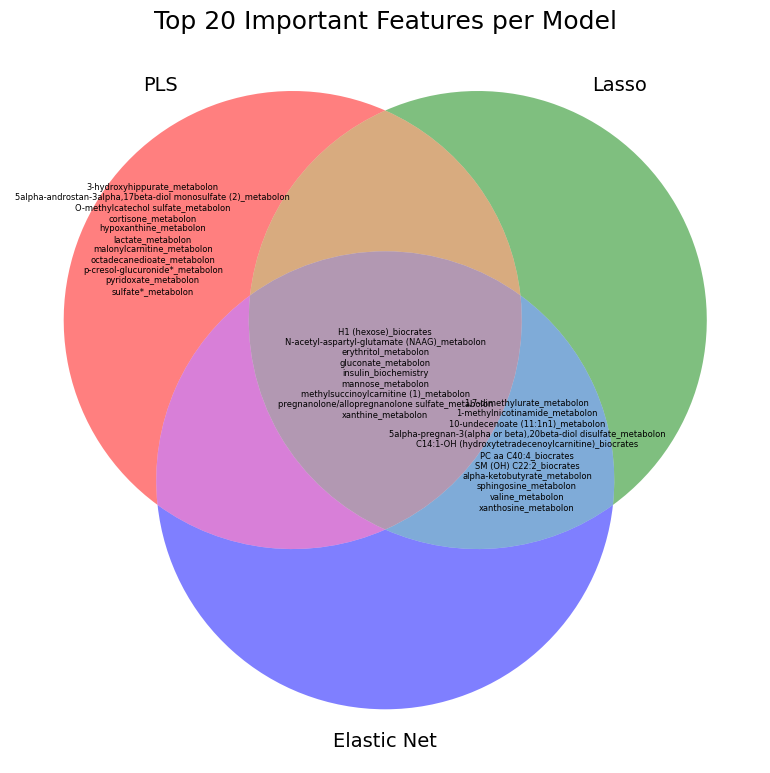

In [211]:
# make the series of important features into lists
pls_important = coef_importance.head(20).index.tolist()
lasso_important = coef_importance_lasso.head(20).index.tolist()
elastic_important = important_en.head(20).index.tolist()


A = set(pls_important)
B = set(lasso_important)
C = set(elastic_important)


from matplotlib_venn import venn3_unweighted
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
venn = venn3_unweighted(
    [A, B, C],
    set_labels=('PLS', 'Lasso', 'Elastic Net'),
    alpha=0.5
)

def safe_set_text(venn, region_id, text_items):
    label = venn.get_label_by_id(region_id)
    if label:
        if len(text_items) == 0:
            label.set_text('')
        else:
            # Limit how many names are printed for readability
            label.set_text('\n'.join(sorted(text_items)))

# [A, B, C] mapping: '100'=A only, '010'=B only, '001'=C only, etc.
safe_set_text(venn, '100', A - B - C)
safe_set_text(venn, '010', B - A - C)
safe_set_text(venn, '001', C - A - B)
safe_set_text(venn, '110', (A & B) - C)
safe_set_text(venn, '101', (A & C) - B)
safe_set_text(venn, '011', (B & C) - A)
safe_set_text(venn, '111', A & B & C)

# Adjust fonts
for lbl in venn.set_labels:
    if lbl: lbl.set_fontsize(14)
for lbl in venn.subset_labels:
    if lbl: lbl.set_fontsize(6)

plt.title("Top 20 Important Features per Model", fontsize=18)
plt.tight_layout()
plt.show()



# LME

In [212]:
df_full

,subject,challenge,challenge_time,C10 (decanoylcarnitine)_biocrates,C10:1 (decenoylcarnitine)_biocrates,C12 (dodecanoylcarnitine)_biocrates,C12:1 (dodecenoylcarnitine)_biocrates,C14 (tetradecanoylcarnitine)_biocrates,C14:1 (tetradecenoylcarnitine)_biocrates,C14:1-OH (hydroxytetradecenoylcarnitine)_biocrates,...,piperine_metabolon,quinate_metabolon,S-allylcysteine_metabolon,stachydrine_metabolon,sulfate*_metabolon,tartarate_metabolon,tartronate (hydroxymalonate)_metabolon,theobromine_metabolon,theophylline_metabolon,thymol sulfate_metabolon
0,1,ogtt,0,-2.798868,-3.467533,-4.056491,-4.310432,-5.210897,-4.878321,-7.380822,...,3.877597,0.917394,0.822445,0.572017,0.020769,0.392537,-0.798868,-1.977668,0.765874,0.024462
1,1,ogtt,15,-2.906169,-3.514573,-4.056491,-4.532825,-5.210897,-4.695255,-7.380822,...,3.819842,0.754374,0.772730,0.585924,0.023610,-0.043646,-0.935117,-1.874613,0.383497,0.007339
2,1,ogtt,30,-2.989650,-3.483581,-4.389867,-4.563199,-5.058894,-4.917025,-7.158429,...,3.855133,0.699019,0.657274,0.511873,-0.002455,-0.223980,-1.053194,-1.871443,0.584578,0.015640
3,1,ogtt,45,-3.043349,-3.563199,-4.122805,-4.563199,-5.158429,-5.179188,-7.158429,...,3.912085,0.953452,0.650397,0.531269,0.019061,0.175429,-1.046027,-1.631288,0.598651,-0.044241
4,1,ogtt,60,-3.220278,-3.717857,-4.445362,-4.795859,-5.210897,-5.333516,-6.965784,...,3.846754,0.806943,0.675093,0.510861,-0.037562,0.319734,-1.128472,-1.942307,0.627607,-0.067183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,15,sld,180,-2.671164,-3.421979,-4.345198,-3.622376,-5.519528,-3.395929,-6.300164,...,-1.012170,-0.406981,0.142609,1.550359,0.129481,0.051163,0.480472,0.872711,-0.827256,-0.476338
761,15,sld,195,-2.409300,-3.226098,-4.046579,-3.346871,-5.378845,-3.183929,-6.122462,...,-1.175543,-0.444016,0.191884,1.547677,0.107807,0.187702,0.478606,0.743963,-0.844358,-0.461494
762,15,sld,210,-2.147437,-3.030218,-3.747960,-3.071366,-5.238162,-2.971930,-5.944760,...,-1.338915,-0.481051,0.241158,1.544995,0.086133,0.324240,0.476740,0.615216,-0.861460,-0.446650
763,15,sld,225,-1.885573,-2.834337,-3.449340,-2.795861,-5.097479,-2.759931,-5.767057,...,-1.502288,-0.518086,0.290433,1.542312,0.064459,0.460778,0.474874,0.486468,-0.878562,-0.431806


In [213]:
# =========================
# Grouped-CV + LME + FDR
# =========================
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from statsmodels.formula.api import mixedlm
from statsmodels.stats.multitest import multipletests
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import r2_score

# ------------- USER SETTINGS -------------
OUTCOME = "glucose_metabolon"
ID_COL = "subject"                     # group/patient id
TIME_COL = "challenge_time"
COND_COL = "challenge"                 # categorical
ALPHA_FDR = 0.05                       # FDR threshold
RANDOM_SLOPE_TIME = True               # random slope on time if True
MAX_FEATURES_POST_FDR = 25             # (safety) cap features per fold to avoid singular fits
USE_REML = True                        # REML for fitting
# REML (Restricted Maximum Likelihood) is a method for estimating variance components in mixed models, often preferred for its unbiasedness in small samples

# ----------------------------------------

df = df_full.copy()

# Basic hygiene
df[ID_COL] = df[ID_COL].astype(str)
df[COND_COL] = df[COND_COL].astype("category")

# Identify metabolite feature columns (exclude known non-features and outcome)
non_feat = {OUTCOME, ID_COL, TIME_COL, COND_COL}
metabolites = [c for c in df.columns if c not in non_feat]


scale_cols = [TIME_COL] + metabolites
df[scale_cols] = df[scale_cols].apply(lambda s: (s - s.mean()) / s.std(ddof=0))

# Helper to build the random-effects formula
re_formula = "~ " + TIME_COL if RANDOM_SLOPE_TIME else "1" #random intercept + time slope per subject
# this helps so each subject gets their own baseline intercept (offset) and time slope to show how they deivate from the population average

# ---------------------------
# Per-metabolite LME on TRAIN
# ---------------------------
def get_metabolite_p_on_train(train_df, metabolite):
    """
    Fit an LME on TRAIN ONLY: outcome ~ metabolite + challenge + time + challenge:time
    Return p-value for metabolite coefficient (used for FDR).
    """
    formula = f"{OUTCOME} ~ {metabolite} + C({COND_COL}) + {TIME_COL} + C({COND_COL}):{TIME_COL}"
    #the formula shows the fixed effects part of the model, with metabolite as a predictor along with challenge, time, and their interaction
    # the random effects part is the re_formula defined earlier, which allows for random intercepts and possibly random slopes for time per subject
    # we use an interaction term between challenge and time to capture how the effect of time on the outcome may differ by challenge type
    # the way glucose changes over time may vary depending on the challenge administered
    try:
        model = mixedlm(formula, train_df, groups=train_df[ID_COL], re_formula=re_formula) # grouped by subject
        fit = model.fit(method="lbfgs", reml=USE_REML) 
        # lbfgs is an optimization algorithm that uses gradient information to efficiently find the best-fitting model parameters
        # reml helps to get better estimates of variance components in mixed models
        p = fit.pvalues.get(metabolite, np.nan) # get p-value for metabolite and return nan if not found
        coef = fit.params.get(metabolite, np.nan)
        return p, coef, None
    except Exception as e:
        return np.nan, np.nan, str(e)

# -----------------------------------------
# Fit final multivariate LME on TRAIN (FDR)
# -----------------------------------------
def fit_final_multivariate_lme(train_df, selected_mets):
    """
    Fit an LME with all FDR-selected metabolites + covariates on the training fold.
    """
    if len(selected_mets) == 0:
        return None, "No features passed FDR."

    # (safety) cap number of features to help convergence if too many pass FDR
    selected_mets = selected_mets[:MAX_FEATURES_POST_FDR]

    fixed_terms = " + ".join(selected_mets + [f"C({COND_COL})", TIME_COL, f"C({COND_COL}):{TIME_COL}"])
    formula = f"{OUTCOME} ~ {fixed_terms}"
    # final model formula with all selected metabolites 

    try:
        model = mixedlm(formula, train_df, groups=train_df[ID_COL], re_formula=re_formula)
        fit = model.fit(method="lbfgs", reml=USE_REML)
        return fit, None
    except Exception as e:
        return None, str(e)

# -------------------
# Predict on TEST set
# -------------------
def predict_on_test(fit, test_df):
    """
    For unseen subjects in the TEST fold, MixedLM.predict uses only the fixed-effects part,
    which is correct (no BLUPs for unseen groups).
    """
    if fit is None:
        return np.full(len(test_df), np.nan)
    try:
        yhat = fit.predict(test_df)
        return np.asarray(yhat)
    except Exception:
        return np.full(len(test_df), np.nan)

# ==============================
# Leave-One-Group-Out CV (LOGO)
# ==============================
logo = LeaveOneGroupOut()
groups = df[ID_COL].values
y_all = df[OUTCOME].values

fold_summaries = []
oof_pred = np.full(len(df), np.nan)

for fold_idx, (train_idx, test_idx) in enumerate(logo.split(df, y_all, groups=groups), start=1):
    train_df = df.iloc[train_idx].copy()
    test_df  = df.iloc[test_idx].copy()

    # ---------- Stage 1: Per-metabolite screen on TRAIN ONLY ----------
    pvals = []
    coefs = []
    met_ok = []
    for m in metabolites:
        p, coef, err = get_metabolite_p_on_train(train_df, m)
        if np.isfinite(p):
            pvals.append(p)
            coefs.append(coef)
            met_ok.append(m)
        # silently skip if model failed on this metabolite

    pvals = np.array(pvals)
    coefs = np.array(coefs)
    met_ok = np.array(met_ok)

    # ---------- Stage 2: FDR on TRAIN ONLY ----------
    if len(pvals) == 0:
        selected = []
    else:
        reject, pvals_adj, _, _ = multipletests(pvals, alpha=ALPHA_FDR, method="fdr_bh") # this line performs the Benjamini-Hochberg FDR correction
        selected = met_ok[reject].tolist() # metabolites that passed FDR

        # heuristic: keep the strongest (by |coef|) if too many pass FDR
        if len(selected) > MAX_FEATURES_POST_FDR:
            sub = pd.DataFrame({"met": met_ok, "p": pvals, "coef": coefs, "rej": reject})
            sub = sub.loc[sub["rej"]].copy()
            sub["abscoef"] = sub["coef"].abs()
            selected = (sub.sort_values(["p", "abscoef"]).head(MAX_FEATURES_POST_FDR)["met"].tolist())

    # ---------- Stage 3: Fit final multivariate LME on TRAIN ----------
    fit, err = fit_final_multivariate_lme(train_df, selected) # fit final model on train with selected features

    # ---------- Stage 4: Predict on TEST ----------
    y_true = test_df[OUTCOME].values
    y_pred = predict_on_test(fit, test_df)

    # R^2 for this fold 
    if np.all(np.isfinite(y_pred)) and y_pred.var() > 0:
        r2 = r2_score(y_true, y_pred)
    else:
        r2 = np.nan

    # store OOF predictions
    oof_pred[test_idx] = y_pred # predictions for held-out subjects

    # Save fold summary
    fold_summaries.append({
        "held_out_subjects": ", ".join(sorted(test_df[ID_COL].unique())),
        "n_train": len(train_df),
        "n_test": len(test_df),
        "n_selected": len(selected),
        "r2_fold": r2, # R^2 on held-out fold
        "selected_features_preview": selected[:10],  # preview first few
        "fit_error": err
    })

# ==============================
# Overall out-of-fold performance
# ==============================
mask = np.isfinite(oof_pred) 
overall_r2 = r2_score(y_all[mask], oof_pred[mask]) if mask.sum() == len(y_all) and oof_pred.var() > 0 else np.nan # overall R^2 across all held-out predictions

results_table = pd.DataFrame(fold_summaries)
print("Per-fold summary:")
print(results_table)

print("\nOverall OOF R^2 (Leave-One-Subject-Out):", overall_r2)

# (Optional) Inspect which features were most frequently selected across folds
# (rerun the selection loop to track; quick way below collects from fold_summaries preview only)
from collections import Counter
freq = Counter()
for row in fold_summaries:
    for m in row["selected_features_preview"]:
        freq[m] += 1

print("\nTop features (from previews; for exact counts, store full selected lists):")
print(pd.Series(freq).sort_values(ascending=False).head(25))


Per-fold summary:
   held_out_subjects  n_train  n_test  n_selected   r2_fold  \
0                  1      714      51          25  0.623279   
1                 10      714      51          25  0.608380   
2                 11      714      51          25  0.571289   
3                 12      714      51          25 -0.492856   
4                 13      714      51          25  0.344491   
5                 14      714      51          25  0.359224   
6                 15      714      51          25  0.143272   
7                  2      714      51          25  0.750706   
8                  3      714      51          25 -0.160366   
9                  4      714      51          25  0.598211   
10                 5      714      51          25  0.637480   
11                 6      714      51          25  0.397831   
12                 7      714      51          25  0.620981   
13                 8      714      51          25  0.536427   
14                 9      714      51

## cluster

In [214]:
df_long = df_full.melt(
    id_vars=["subject", "challenge", "challenge_time", "glucose_metabolon"],
    var_name="metabolite_name",
    value_name="value"
)
df_long

,subject,challenge,challenge_time,glucose_metabolon,metabolite_name,value
0,1,ogtt,0,-0.154731,C10 (decanoylcarnitine)_biocrates,-2.798868
1,1,ogtt,15,0.393526,C10 (decanoylcarnitine)_biocrates,-2.906169
2,1,ogtt,30,0.508631,C10 (decanoylcarnitine)_biocrates,-2.989650
3,1,ogtt,45,0.234256,C10 (decanoylcarnitine)_biocrates,-3.043349
4,1,ogtt,60,0.268554,C10 (decanoylcarnitine)_biocrates,-3.220278
...,...,...,...,...,...,...
485005,15,sld,180,-0.241441,thymol sulfate_metabolon,-0.476338
485006,15,sld,195,-0.229201,thymol sulfate_metabolon,-0.461494
485007,15,sld,210,-0.216961,thymol sulfate_metabolon,-0.446650
485008,15,sld,225,-0.204720,thymol sulfate_metabolon,-0.431806


In [215]:
exploded

,cluster,challenge,metabolite
0,0,ogtt,"1,5-anhydroglucitol (1,5-AG)_metabolon"
0,0,ogtt,1-(1-enyl-oleoyl)-GPC (P-18:1)*_metabolon
0,0,ogtt,1-(1-enyl-oleoyl)-GPE (P-18:1)*_metabolon
0,0,ogtt,1-(1-enyl-palmitoyl)-GPC (P-16:0)*_metabolon
0,0,ogtt,1-(1-enyl-palmitoyl)-GPE (P-16:0)*_metabolon
...,...,...,...
22,7,sld,tyrosine_biocrates
22,7,sld,tyrosine_metabolon
22,7,sld,ursodeoxycholate_metabolon
22,7,sld,valine_biocrates


In [216]:
import pandas as pd

# Merge cluster/challenge info into the long dataframe
df_merged = df_long.merge(
    exploded,
    left_on=['metabolite_name', 'challenge'],
    right_on=['metabolite', 'challenge'],
    how='left',
    validate='m:1'         # raises if many-to-one doesn't hold
)

# Clean up
df_merged.drop(columns=["metabolite"], inplace=True)
df_merged["cluster"] = df_merged["cluster"].astype("category")

df_merged

,subject,challenge,challenge_time,glucose_metabolon,metabolite_name,value,cluster
0,1,ogtt,0,-0.154731,C10 (decanoylcarnitine)_biocrates,-2.798868,1
1,1,ogtt,15,0.393526,C10 (decanoylcarnitine)_biocrates,-2.906169,1
2,1,ogtt,30,0.508631,C10 (decanoylcarnitine)_biocrates,-2.989650,1
3,1,ogtt,45,0.234256,C10 (decanoylcarnitine)_biocrates,-3.043349,1
4,1,ogtt,60,0.268554,C10 (decanoylcarnitine)_biocrates,-3.220278,1
...,...,...,...,...,...,...,...
485005,15,sld,180,-0.241441,thymol sulfate_metabolon,-0.476338,1
485006,15,sld,195,-0.229201,thymol sulfate_metabolon,-0.461494,1
485007,15,sld,210,-0.216961,thymol sulfate_metabolon,-0.446650,1
485008,15,sld,225,-0.204720,thymol sulfate_metabolon,-0.431806,1


In [217]:
#make sure all 8 clusters are represented
df_merged["cluster"].cat.categories

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

In [218]:
df_merged

,subject,challenge,challenge_time,glucose_metabolon,metabolite_name,value,cluster
0,1,ogtt,0,-0.154731,C10 (decanoylcarnitine)_biocrates,-2.798868,1
1,1,ogtt,15,0.393526,C10 (decanoylcarnitine)_biocrates,-2.906169,1
2,1,ogtt,30,0.508631,C10 (decanoylcarnitine)_biocrates,-2.989650,1
3,1,ogtt,45,0.234256,C10 (decanoylcarnitine)_biocrates,-3.043349,1
4,1,ogtt,60,0.268554,C10 (decanoylcarnitine)_biocrates,-3.220278,1
...,...,...,...,...,...,...,...
485005,15,sld,180,-0.241441,thymol sulfate_metabolon,-0.476338,1
485006,15,sld,195,-0.229201,thymol sulfate_metabolon,-0.461494,1
485007,15,sld,210,-0.216961,thymol sulfate_metabolon,-0.446650,1
485008,15,sld,225,-0.204720,thymol sulfate_metabolon,-0.431806,1


In [219]:
top_features = pd.Series(freq).sort_values(ascending=False).head(25)

print("\nTop features (from previews; for exact counts, store full selected lists):")
print(top_features)



Top features (from previews; for exact counts, store full selected lists):
gluconate_metabolon              15
fructose_metabolon               15
glutamate_metabolon              15
insulin_biochemistry             15
phosphoethanolamine_metabolon    14
pyruvate_metabolon               12
glycerate_metabolon              11
palmitoylcholine_metabolon        9
orotate_metabolon                 9
phosphate_metabolon               9
isoleucine_metabolon              5
adenosine_metabolon               4
spermidine_metabolon              3
creatine_metabolon                3
isovalerylglycine_metabolon       2
theobromine_metabolon             2
leucine_metabolon                 2
methylsuccinate_metabolon         2
pantothenate_metabolon            1
maltose_metabolon                 1
glycolithocholate_metabolon       1
dtype: int64


In [220]:
# compare these features and show what their cluster assignments are
exploded_top = exploded[exploded["metabolite"].isin(top_features.index)]

In [221]:
exploded_top

,cluster,challenge,metabolite
0,0,ogtt,adenosine_metabolon
0,0,ogtt,creatine_metabolon
0,0,ogtt,gluconate_metabolon
0,0,ogtt,glycerate_metabolon
0,0,ogtt,orotate_metabolon
...,...,...,...
22,7,sld,fructose_metabolon
22,7,sld,glutamate_metabolon
22,7,sld,insulin_biochemistry
22,7,sld,isoleucine_metabolon


# Cluster assignments for the 20 Metabolites

In [222]:
pivot = exploded_top.pivot_table(
    index="metabolite",
    columns="challenge",
    values="cluster",
    aggfunc=lambda x: list(x.unique())
)

print(pivot)


challenge                     ogtt oltt  sld
metabolite                                  
adenosine_metabolon            [0]  [3]  [3]
creatine_metabolon             [0]  [0]  [5]
fructose_metabolon             [3]  [7]  [7]
gluconate_metabolon            [0]  [0]  [0]
glutamate_metabolon            [3]  [0]  [7]
glycerate_metabolon            [0]  [0]  [5]
glycolithocholate_metabolon    [7]  [4]  [2]
insulin_biochemistry           [7]  [7]  [7]
isoleucine_metabolon           [1]  [0]  [7]
isovalerylglycine_metabolon    [3]  [7]  [2]
leucine_metabolon              [1]  [0]  [7]
maltose_metabolon              [7]  [7]  [5]
methylsuccinate_metabolon      [3]  [5]  [0]
orotate_metabolon              [0]  [5]  [5]
palmitoylcholine_metabolon     [7]  [7]  [1]
pantothenate_metabolon         [0]  [0]  [5]
phosphate_metabolon            [0]  [3]  [0]
phosphoethanolamine_metabolon  [0]  [3]  [3]
pyruvate_metabolon             [0]  [5]  [5]
spermidine_metabolon           [3]  [1]  [1]
theobromin

In [223]:
df_pivot = pivot.reset_index()
df_pivot.columns.name = None


In [224]:
df2 = df_pivot.copy()
for col in ["ogtt", "oltt", "sld"]:
    df2[col] = df2[col].str[0]    # extract the number from the list
df2

,metabolite,ogtt,oltt,sld
0,adenosine_metabolon,0,3,3
1,creatine_metabolon,0,0,5
2,fructose_metabolon,3,7,7
3,gluconate_metabolon,0,0,0
4,glutamate_metabolon,3,0,7
5,glycerate_metabolon,0,0,5
6,glycolithocholate_metabolon,7,4,2
7,insulin_biochemistry,7,7,7
8,isoleucine_metabolon,1,0,7
9,isovalerylglycine_metabolon,3,7,2


### most common cluster by test

In [225]:
most_common_ogtt = df2["ogtt"].mode()[0]
most_common_oltt = df2["oltt"].mode()[0]
most_common_sld  = df2["sld"].mode()[0]

print("Most common OGTT cluster:", most_common_ogtt)
print("Most common OLTT cluster:", most_common_oltt)
print("Most common SLD cluster:", most_common_sld)


Most common OGTT cluster: 0
Most common OLTT cluster: 0
Most common SLD cluster: 5


In [226]:
print(df2["ogtt"].value_counts())
print(df2["oltt"].value_counts())
print(df2["sld"].value_counts())



0    9
3    6
7    4
1    2
Name: ogtt, dtype: int64
0    7
7    5
5    4
3    3
4    1
1    1
Name: oltt, dtype: int64
5    6
7    5
0    3
3    2
2    2
1    2
4    1
Name: sld, dtype: int64


### Metabolic Pathways



In [227]:
#metaolic pathways 

import pandas as pd

data = {
    "metabolite": [
        "gluconate", "fructose", "glutamate", "insulin", "phosphoethanolamine",
        "pyruvate", "glycerate", "palmitoylcholine", "orotate", "phosphate",
        "isoleucine", "adenosine", "spermidine", "creatine", "isovalerylglycine",
        "theobromine", "leucine", "methylsuccinate", "pantothenate",
        "maltose", "glycolithocholate"
    ],
    "pathway": [
        "Pentose phosphate pathway / carbohydrate metabolism",
        "Fructose metabolism / glycolysis",
        "Glutamate–glutamine cycle / amino acid metabolism",
        "Hormone (insulin) – regulates carbohydrate and lipid metabolism",
        "Phospholipid metabolism (phosphatidylethanolamine synthesis)",
        "Glycolysis / TCA cycle / gluconeogenesis",
        "Serine/glycine metabolism; glycolysis intermediate",
        "Phosphatidylcholine & fatty acid metabolism",
        "Pyrimidine biosynthesis",
        "Central metabolic cofactor (energy/nucleotide metabolism)",
        "Branched-chain amino acid metabolism",
        "Purine metabolism",
        "Polyamine metabolism",
        "Arginine–glycine pathway / energy buffering",
        "Leucine catabolism product (BCAA metabolism)",
        "Xanthine / methylxanthine metabolism",
        "Branched-chain amino acid metabolism",
        "TCA cycle (succinate pathway)",
        "CoA biosynthesis (vitamin B5 metabolism)",
        "Carbohydrate digestion / glucose metabolism",
        "Bile acid metabolism"
    ]
}

df_pathways = pd.DataFrame(data)
df_pathways


,metabolite,pathway
0,gluconate,Pentose phosphate pathway / carbohydrate metab...
1,fructose,Fructose metabolism / glycolysis
2,glutamate,Glutamate–glutamine cycle / amino acid metabolism
3,insulin,Hormone (insulin) – regulates carbohydrate and...
4,phosphoethanolamine,Phospholipid metabolism (phosphatidylethanolam...
5,pyruvate,Glycolysis / TCA cycle / gluconeogenesis
6,glycerate,Serine/glycine metabolism; glycolysis intermed...
7,palmitoylcholine,Phosphatidylcholine & fatty acid metabolism
8,orotate,Pyrimidine biosynthesis
9,phosphate,Central metabolic cofactor (energy/nucleotide ...


## LME using different Max Features

3 features

In [228]:
# see how it changes with different number of features, using the same LME model as above

# =========================
# Grouped-CV + LME + FDR
# =========================


# ------------- USER SETTINGS -------------
OUTCOME = "glucose_metabolon"
ID_COL = "subject"                     # group/patient id
TIME_COL = "challenge_time"
COND_COL = "challenge"                 # categorical
ALPHA_FDR = 0.05                       # FDR threshold
RANDOM_SLOPE_TIME = True               # random slope on time if True
MAX_FEATURES_POST_FDR = 3             # (safety) cap features per fold to avoid singular fits
USE_REML = True                        # REML for fitting
# REML (Restricted Maximum Likelihood) is a method for estimating variance components in mixed models, often preferred for its unbiasedness in small samples

# ----------------------------------------

df = df_full.copy()

# Basic hygiene
df[ID_COL] = df[ID_COL].astype(str)
df[COND_COL] = df[COND_COL].astype("category")

# Identify metabolite feature columns (exclude known non-features and outcome)
non_feat = {OUTCOME, ID_COL, TIME_COL, COND_COL}
metabolites = [c for c in df.columns if c not in non_feat]


scale_cols = [TIME_COL] + metabolites
df[scale_cols] = df[scale_cols].apply(lambda s: (s - s.mean()) / s.std(ddof=0))

# Helper to build the random-effects formula
re_formula = "~ " + TIME_COL if RANDOM_SLOPE_TIME else "1" #random intercept + time slope per subject
# this helps so each subject gets their own baseline intercept (offset) and time slope to show how they deivate from the population average

# ---------------------------
# Per-metabolite LME on TRAIN
# ---------------------------
def get_metabolite_p_on_train(train_df, metabolite):
    """
    Fit an LME on TRAIN ONLY: outcome ~ metabolite + challenge + time + challenge:time
    Return p-value for metabolite coefficient (used for FDR).
    """
    formula = f"{OUTCOME} ~ {metabolite} + C({COND_COL}) + {TIME_COL} + C({COND_COL}):{TIME_COL}"
    #the formula shows the fixed effects part of the model, with metabolite as a predictor along with challenge, time, and their interaction
    # the random effects part is the re_formula defined earlier, which allows for random intercepts and possibly random slopes for time per subject
    # we use an interaction term between challenge and time to capture how the effect of time on the outcome may differ by challenge type
    # the way glucose changes over time may vary depending on the challenge administered
    try:
        model = mixedlm(formula, train_df, groups=train_df[ID_COL], re_formula=re_formula) # grouped by subject
        fit = model.fit(method="lbfgs", reml=USE_REML) 
        # lbfgs is an optimization algorithm that uses gradient information to efficiently find the best-fitting model parameters
        # reml helps to get better estimates of variance components in mixed models
        p = fit.pvalues.get(metabolite, np.nan) # get p-value for metabolite and return nan if not found
        coef = fit.params.get(metabolite, np.nan)
        return p, coef, None
    except Exception as e:
        return np.nan, np.nan, str(e)

# -----------------------------------------
# Fit final multivariate LME on TRAIN (FDR)
# -----------------------------------------
def fit_final_multivariate_lme(train_df, selected_mets):
    """
    Fit an LME with all FDR-selected metabolites + covariates on the training fold.
    """
    if len(selected_mets) == 0:
        return None, "No features passed FDR."

    # (safety) cap number of features to help convergence if too many pass FDR
    selected_mets = selected_mets[:MAX_FEATURES_POST_FDR]

    fixed_terms = " + ".join(selected_mets + [f"C({COND_COL})", TIME_COL, f"C({COND_COL}):{TIME_COL}"])
    formula = f"{OUTCOME} ~ {fixed_terms}"
    # final model formula with all selected metabolites 

    try:
        model = mixedlm(formula, train_df, groups=train_df[ID_COL], re_formula=re_formula)
        fit = model.fit(method="lbfgs", reml=USE_REML)
        return fit, None
    except Exception as e:
        return None, str(e)

# -------------------
# Predict on TEST set
# -------------------
def predict_on_test(fit, test_df):
    """
    For unseen subjects in the TEST fold, MixedLM.predict uses only the fixed-effects part,
    which is correct (no BLUPs for unseen groups).
    """
    if fit is None:
        return np.full(len(test_df), np.nan)
    try:
        yhat = fit.predict(test_df)
        return np.asarray(yhat)
    except Exception:
        return np.full(len(test_df), np.nan)

# ==============================
# Leave-One-Group-Out CV (LOGO)
# ==============================
logo = LeaveOneGroupOut()
groups = df[ID_COL].values
y_all = df[OUTCOME].values

fold_summaries = []
oof_pred = np.full(len(df), np.nan)

for fold_idx, (train_idx, test_idx) in enumerate(logo.split(df, y_all, groups=groups), start=1):
    train_df = df.iloc[train_idx].copy()
    test_df  = df.iloc[test_idx].copy()

    # ---------- Stage 1: Per-metabolite screen on TRAIN ONLY ----------
    pvals = []
    coefs = []
    met_ok = []
    for m in metabolites:
        p, coef, err = get_metabolite_p_on_train(train_df, m)
        if np.isfinite(p):
            pvals.append(p)
            coefs.append(coef)
            met_ok.append(m)
        # silently skip if model failed on this metabolite

    pvals = np.array(pvals)
    coefs = np.array(coefs)
    met_ok = np.array(met_ok)

    # ---------- Stage 2: FDR on TRAIN ONLY ----------
    if len(pvals) == 0:
        selected = []
    else:
        reject, pvals_adj, _, _ = multipletests(pvals, alpha=ALPHA_FDR, method="fdr_bh") # this line performs the Benjamini-Hochberg FDR correction
        selected = met_ok[reject].tolist() # metabolites that passed FDR

        # heuristic: keep the strongest (by |coef|) if too many pass FDR
        if len(selected) > MAX_FEATURES_POST_FDR:
            sub = pd.DataFrame({"met": met_ok, "p": pvals, "coef": coefs, "rej": reject})
            sub = sub.loc[sub["rej"]].copy()
            sub["abscoef"] = sub["coef"].abs()
            selected = (sub.sort_values(["p", "abscoef"]).head(MAX_FEATURES_POST_FDR)["met"].tolist())

    # ---------- Stage 3: Fit final multivariate LME on TRAIN ----------
    fit, err = fit_final_multivariate_lme(train_df, selected) # fit final model on train with selected features

    # ---------- Stage 4: Predict on TEST ----------
    y_true = test_df[OUTCOME].values
    y_pred = predict_on_test(fit, test_df)

    # R^2 for this fold 
    if np.all(np.isfinite(y_pred)) and y_pred.var() > 0:
        r2 = r2_score(y_true, y_pred)
    else:
        r2 = np.nan

    # store OOF predictions
    oof_pred[test_idx] = y_pred # predictions for held-out subjects

    # Save fold summary
    fold_summaries.append({
        "held_out_subjects": ", ".join(sorted(test_df[ID_COL].unique())),
        "n_train": len(train_df),
        "n_test": len(test_df),
        "n_selected": len(selected),
        "r2_fold": r2, # R^2 on held-out fold
        "selected_features_preview": selected[:10],  # preview first few
        "fit_error": err
    })

# ==============================
# Overall out-of-fold performance
# ==============================
mask = np.isfinite(oof_pred) 
overall_r2 = r2_score(y_all[mask], oof_pred[mask]) if mask.sum() == len(y_all) and oof_pred.var() > 0 else np.nan # overall R^2 across all held-out predictions

results_table = pd.DataFrame(fold_summaries)
print("Per-fold summary:")
print(results_table)

print("\nOverall OOF R^2 (Leave-One-Subject-Out):", overall_r2)

# (Optional) Inspect which features were most frequently selected across folds
# (rerun the selection loop to track; quick way below collects from fold_summaries preview only)
from collections import Counter
freq = Counter()
for row in fold_summaries:
    for m in row["selected_features_preview"]:
        freq[m] += 1

print("\nTop features (from previews; for exact counts, store full selected lists):")
print(pd.Series(freq).sort_values(ascending=False).head(25))


Per-fold summary:
   held_out_subjects  n_train  n_test  n_selected   r2_fold  \
0                  1      714      51           3  0.819400   
1                 10      714      51           3  0.564761   
2                 11      714      51           3  0.644391   
3                 12      714      51           3 -1.514001   
4                 13      714      51           3  0.381778   
5                 14      714      51           3  0.010907   
6                 15      714      51           3  0.631515   
7                  2      714      51           3  0.540863   
8                  3      714      51           3  0.172610   
9                  4      714      51           3  0.489085   
10                 5      714      51           3  0.487059   
11                 6      714      51           3  0.350926   
12                 7      714      51           3  0.751506   
13                 8      714      51           3  0.638363   
14                 9      714      51

5 features

In [229]:
# see how it changes with different number of features, using the same LME model as above

# =========================
# Grouped-CV + LME + FDR
# =========================


# ------------- USER SETTINGS -------------
OUTCOME = "glucose_metabolon"
ID_COL = "subject"                     # group/patient id
TIME_COL = "challenge_time"
COND_COL = "challenge"                 # categorical
ALPHA_FDR = 0.05                       # FDR threshold
RANDOM_SLOPE_TIME = True               # random slope on time if True
MAX_FEATURES_POST_FDR = 5             # (safety) cap features per fold to avoid singular fits
USE_REML = True                        # REML for fitting
# REML (Restricted Maximum Likelihood) is a method for estimating variance components in mixed models, often preferred for its unbiasedness in small samples

# ----------------------------------------

df = df_full.copy()

# Basic hygiene
df[ID_COL] = df[ID_COL].astype(str)
df[COND_COL] = df[COND_COL].astype("category")

# Identify metabolite feature columns (exclude known non-features and outcome)
non_feat = {OUTCOME, ID_COL, TIME_COL, COND_COL}
metabolites = [c for c in df.columns if c not in non_feat]


scale_cols = [TIME_COL] + metabolites
df[scale_cols] = df[scale_cols].apply(lambda s: (s - s.mean()) / s.std(ddof=0))

# Helper to build the random-effects formula
re_formula = "~ " + TIME_COL if RANDOM_SLOPE_TIME else "1" #random intercept + time slope per subject
# this helps so each subject gets their own baseline intercept (offset) and time slope to show how they deivate from the population average



# ==============================
# Leave-One-Group-Out CV (LOGO)
# ==============================
logo = LeaveOneGroupOut()
groups = df[ID_COL].values
y_all = df[OUTCOME].values

fold_summaries = []
oof_pred = np.full(len(df), np.nan)

for fold_idx, (train_idx, test_idx) in enumerate(logo.split(df, y_all, groups=groups), start=1):
    train_df = df.iloc[train_idx].copy()
    test_df  = df.iloc[test_idx].copy()

    # ---------- Stage 1: Per-metabolite screen on TRAIN ONLY ----------
    pvals = []
    coefs = []
    met_ok = []
    for m in metabolites:
        p, coef, err = get_metabolite_p_on_train(train_df, m)
        if np.isfinite(p):
            pvals.append(p)
            coefs.append(coef)
            met_ok.append(m)
        # silently skip if model failed on this metabolite

    pvals = np.array(pvals)
    coefs = np.array(coefs)
    met_ok = np.array(met_ok)

    # ---------- Stage 2: FDR on TRAIN ONLY ----------
    if len(pvals) == 0:
        selected = []
    else:
        reject, pvals_adj, _, _ = multipletests(pvals, alpha=ALPHA_FDR, method="fdr_bh") # this line performs the Benjamini-Hochberg FDR correction
        selected = met_ok[reject].tolist() # metabolites that passed FDR

        # heuristic: keep the strongest (by |coef|) if too many pass FDR
        if len(selected) > MAX_FEATURES_POST_FDR:
            sub = pd.DataFrame({"met": met_ok, "p": pvals, "coef": coefs, "rej": reject})
            sub = sub.loc[sub["rej"]].copy()
            sub["abscoef"] = sub["coef"].abs()
            selected = (sub.sort_values(["p", "abscoef"]).head(MAX_FEATURES_POST_FDR)["met"].tolist())

    # ---------- Stage 3: Fit final multivariate LME on TRAIN ----------
    fit, err = fit_final_multivariate_lme(train_df, selected) # fit final model on train with selected features

    # ---------- Stage 4: Predict on TEST ----------
    y_true = test_df[OUTCOME].values
    y_pred = predict_on_test(fit, test_df)

    # R^2 for this fold 
    if np.all(np.isfinite(y_pred)) and y_pred.var() > 0:
        r2 = r2_score(y_true, y_pred)
    else:
        r2 = np.nan

    # store OOF predictions
    oof_pred[test_idx] = y_pred # predictions for held-out subjects

    # Save fold summary
    fold_summaries.append({
        "held_out_subjects": ", ".join(sorted(test_df[ID_COL].unique())),
        "n_train": len(train_df),
        "n_test": len(test_df),
        "n_selected": len(selected),
        "r2_fold": r2, # R^2 on held-out fold
        "selected_features_preview": selected[:10],  # preview first few
        "fit_error": err
    })

# ==============================
# Overall out-of-fold performance
# ==============================
mask = np.isfinite(oof_pred) 
overall_r2 = r2_score(y_all[mask], oof_pred[mask]) if mask.sum() == len(y_all) and oof_pred.var() > 0 else np.nan # overall R^2 across all held-out predictions

results_table = pd.DataFrame(fold_summaries)
print("Per-fold summary:")
print(results_table)

print("\nOverall OOF R^2 (Leave-One-Subject-Out):", overall_r2)

# (Optional) Inspect which features were most frequently selected across folds
# (rerun the selection loop to track; quick way below collects from fold_summaries preview only)
from collections import Counter
freq = Counter()
for row in fold_summaries:
    for m in row["selected_features_preview"]:
        freq[m] += 1

print("\nTop features (from previews; for exact counts, store full selected lists):")
print(pd.Series(freq).sort_values(ascending=False).head(25))


Per-fold summary:
   held_out_subjects  n_train  n_test  n_selected   r2_fold  \
0                  1      714      51           5  0.749737   
1                 10      714      51           5  0.620102   
2                 11      714      51           5  0.677182   
3                 12      714      51           5 -2.024399   
4                 13      714      51           5  0.398000   
5                 14      714      51           5 -0.020938   
6                 15      714      51           5  0.590253   
7                  2      714      51           5  0.496916   
8                  3      714      51           5  0.216161   
9                  4      714      51           5  0.472864   
10                 5      714      51           5  0.496585   
11                 6      714      51           5  0.308721   
12                 7      714      51           5  0.820622   
13                 8      714      51           5  0.529596   
14                 9      714      51

10 features

In [230]:
# see how it changes with different number of features, using the same LME model as above

# =========================
# Grouped-CV + LME + FDR
# =========================


# ------------- USER SETTINGS -------------
OUTCOME = "glucose_metabolon"
ID_COL = "subject"                     # group/patient id
TIME_COL = "challenge_time"
COND_COL = "challenge"                 # categorical
ALPHA_FDR = 0.05                       # FDR threshold
RANDOM_SLOPE_TIME = True               # random slope on time if True
MAX_FEATURES_POST_FDR = 10             # (safety) cap features per fold to avoid singular fits
USE_REML = True                        # REML for fitting
# REML (Restricted Maximum Likelihood) is a method for estimating variance components in mixed models, often preferred for its unbiasedness in small samples

# ----------------------------------------

df = df_full.copy()

# Basic hygiene
df[ID_COL] = df[ID_COL].astype(str)
df[COND_COL] = df[COND_COL].astype("category")

# Identify metabolite feature columns (exclude known non-features and outcome)
non_feat = {OUTCOME, ID_COL, TIME_COL, COND_COL}
metabolites = [c for c in df.columns if c not in non_feat]


scale_cols = [TIME_COL] + metabolites
df[scale_cols] = df[scale_cols].apply(lambda s: (s - s.mean()) / s.std(ddof=0))

# Helper to build the random-effects formula
re_formula = "~ " + TIME_COL if RANDOM_SLOPE_TIME else "1" #random intercept + time slope per subject
# this helps so each subject gets their own baseline intercept (offset) and time slope to show how they deivate from the population average



# ==============================
# Leave-One-Group-Out CV (LOGO)
# ==============================
logo = LeaveOneGroupOut()
groups = df[ID_COL].values
y_all = df[OUTCOME].values

fold_summaries = []
oof_pred = np.full(len(df), np.nan)

for fold_idx, (train_idx, test_idx) in enumerate(logo.split(df, y_all, groups=groups), start=1):
    train_df = df.iloc[train_idx].copy()
    test_df  = df.iloc[test_idx].copy()

    # ---------- Stage 1: Per-metabolite screen on TRAIN ONLY ----------
    pvals = []
    coefs = []
    met_ok = []
    for m in metabolites:
        p, coef, err = get_metabolite_p_on_train(train_df, m)
        if np.isfinite(p):
            pvals.append(p)
            coefs.append(coef)
            met_ok.append(m)
        # silently skip if model failed on this metabolite

    pvals = np.array(pvals)
    coefs = np.array(coefs)
    met_ok = np.array(met_ok)

    # ---------- Stage 2: FDR on TRAIN ONLY ----------
    if len(pvals) == 0:
        selected = []
    else:
        reject, pvals_adj, _, _ = multipletests(pvals, alpha=ALPHA_FDR, method="fdr_bh") # this line performs the Benjamini-Hochberg FDR correction
        selected = met_ok[reject].tolist() # metabolites that passed FDR

        # heuristic: keep the strongest (by |coef|) if too many pass FDR
        if len(selected) > MAX_FEATURES_POST_FDR:
            sub = pd.DataFrame({"met": met_ok, "p": pvals, "coef": coefs, "rej": reject})
            sub = sub.loc[sub["rej"]].copy()
            sub["abscoef"] = sub["coef"].abs()
            selected = (sub.sort_values(["p", "abscoef"]).head(MAX_FEATURES_POST_FDR)["met"].tolist())

    # ---------- Stage 3: Fit final multivariate LME on TRAIN ----------
    fit, err = fit_final_multivariate_lme(train_df, selected) # fit final model on train with selected features

    # ---------- Stage 4: Predict on TEST ----------
    y_true = test_df[OUTCOME].values
    y_pred = predict_on_test(fit, test_df)

    # R^2 for this fold 
    if np.all(np.isfinite(y_pred)) and y_pred.var() > 0:
        r2 = r2_score(y_true, y_pred)
    else:
        r2 = np.nan

    # store OOF predictions
    oof_pred[test_idx] = y_pred # predictions for held-out subjects

    # Save fold summary
    fold_summaries.append({
        "held_out_subjects": ", ".join(sorted(test_df[ID_COL].unique())),
        "n_train": len(train_df),
        "n_test": len(test_df),
        "n_selected": len(selected),
        "r2_fold": r2, # R^2 on held-out fold
        "selected_features_preview": selected[:10],  # preview first few
        "fit_error": err
    })

# ==============================
# Overall out-of-fold performance
# ==============================
mask = np.isfinite(oof_pred) 
overall_r2 = r2_score(y_all[mask], oof_pred[mask]) if mask.sum() == len(y_all) and oof_pred.var() > 0 else np.nan # overall R^2 across all held-out predictions

results_table = pd.DataFrame(fold_summaries)
print("Per-fold summary:")
print(results_table)

print("\nOverall OOF R^2 (Leave-One-Subject-Out):", overall_r2)

# (Optional) Inspect which features were most frequently selected across folds
# (rerun the selection loop to track; quick way below collects from fold_summaries preview only)
from collections import Counter
freq = Counter()
for row in fold_summaries:
    for m in row["selected_features_preview"]:
        freq[m] += 1

print("\nTop features (from previews; for exact counts, store full selected lists):")
print(pd.Series(freq).sort_values(ascending=False).head(25))


Per-fold summary:
   held_out_subjects  n_train  n_test  n_selected   r2_fold  \
0                  1      714      51          10  0.416435   
1                 10      714      51          10  0.625888   
2                 11      714      51          10  0.676289   
3                 12      714      51          10 -2.177146   
4                 13      714      51          10  0.398014   
5                 14      714      51          10  0.195453   
6                 15      714      51          10  0.652259   
7                  2      714      51          10  0.606273   
8                  3      714      51          10  0.145295   
9                  4      714      51          10  0.670996   
10                 5      714      51          10  0.227589   
11                 6      714      51          10 -0.258962   
12                 7      714      51          10  0.864436   
13                 8      714      51          10  0.710933   
14                 9      714      51

15 Features

In [231]:
# see how it changes with different number of features, using the same LME model as above

# =========================
# Grouped-CV + LME + FDR
# =========================


# ------------- USER SETTINGS -------------
OUTCOME = "glucose_metabolon"
ID_COL = "subject"                     # group/patient id
TIME_COL = "challenge_time"
COND_COL = "challenge"                 # categorical
ALPHA_FDR = 0.05                       # FDR threshold
RANDOM_SLOPE_TIME = True               # random slope on time if True
MAX_FEATURES_POST_FDR = 15             # (safety) cap features per fold to avoid singular fits
USE_REML = True                        # REML for fitting
# REML (Restricted Maximum Likelihood) is a method for estimating variance components in mixed models, often preferred for its unbiasedness in small samples

# ----------------------------------------

df = df_full.copy()

# Basic hygiene
df[ID_COL] = df[ID_COL].astype(str)
df[COND_COL] = df[COND_COL].astype("category")

# Identify metabolite feature columns (exclude known non-features and outcome)
non_feat = {OUTCOME, ID_COL, TIME_COL, COND_COL}
metabolites = [c for c in df.columns if c not in non_feat]


scale_cols = [TIME_COL] + metabolites
df[scale_cols] = df[scale_cols].apply(lambda s: (s - s.mean()) / s.std(ddof=0))

# Helper to build the random-effects formula
re_formula = "~ " + TIME_COL if RANDOM_SLOPE_TIME else "1" #random intercept + time slope per subject
# this helps so each subject gets their own baseline intercept (offset) and time slope to show how they deivate from the population average





# ==============================
# Leave-One-Group-Out CV (LOGO)
# ==============================
logo = LeaveOneGroupOut()
groups = df[ID_COL].values
y_all = df[OUTCOME].values

fold_summaries = []
oof_pred = np.full(len(df), np.nan)

for fold_idx, (train_idx, test_idx) in enumerate(logo.split(df, y_all, groups=groups), start=1):
    train_df = df.iloc[train_idx].copy()
    test_df  = df.iloc[test_idx].copy()

    # ---------- Stage 1: Per-metabolite screen on TRAIN ONLY ----------
    pvals = []
    coefs = []
    met_ok = []
    for m in metabolites:
        p, coef, err = get_metabolite_p_on_train(train_df, m)
        if np.isfinite(p):
            pvals.append(p)
            coefs.append(coef)
            met_ok.append(m)
        # silently skip if model failed on this metabolite

    pvals = np.array(pvals)
    coefs = np.array(coefs)
    met_ok = np.array(met_ok)

    # ---------- Stage 2: FDR on TRAIN ONLY ----------
    if len(pvals) == 0:
        selected = []
    else:
        reject, pvals_adj, _, _ = multipletests(pvals, alpha=ALPHA_FDR, method="fdr_bh") # this line performs the Benjamini-Hochberg FDR correction
        selected = met_ok[reject].tolist() # metabolites that passed FDR

        # heuristic: keep the strongest (by |coef|) if too many pass FDR
        if len(selected) > MAX_FEATURES_POST_FDR:
            sub = pd.DataFrame({"met": met_ok, "p": pvals, "coef": coefs, "rej": reject})
            sub = sub.loc[sub["rej"]].copy()
            sub["abscoef"] = sub["coef"].abs()
            selected = (sub.sort_values(["p", "abscoef"]).head(MAX_FEATURES_POST_FDR)["met"].tolist())

    # ---------- Stage 3: Fit final multivariate LME on TRAIN ----------
    fit, err = fit_final_multivariate_lme(train_df, selected) # fit final model on train with selected features

    # ---------- Stage 4: Predict on TEST ----------
    y_true = test_df[OUTCOME].values
    y_pred = predict_on_test(fit, test_df)

    # R^2 for this fold 
    if np.all(np.isfinite(y_pred)) and y_pred.var() > 0:
        r2 = r2_score(y_true, y_pred)
    else:
        r2 = np.nan

    # store OOF predictions
    oof_pred[test_idx] = y_pred # predictions for held-out subjects

    # Save fold summary
    fold_summaries.append({
        "held_out_subjects": ", ".join(sorted(test_df[ID_COL].unique())),
        "n_train": len(train_df),
        "n_test": len(test_df),
        "n_selected": len(selected),
        "r2_fold": r2, # R^2 on held-out fold
        "selected_features_preview": selected[:10],  # preview first few
        "fit_error": err
    })

# ==============================
# Overall out-of-fold performance
# ==============================
mask = np.isfinite(oof_pred) 
overall_r2 = r2_score(y_all[mask], oof_pred[mask]) if mask.sum() == len(y_all) and oof_pred.var() > 0 else np.nan # overall R^2 across all held-out predictions

results_table = pd.DataFrame(fold_summaries)
print("Per-fold summary:")
print(results_table)

print("\nOverall OOF R^2 (Leave-One-Subject-Out):", overall_r2)

# (Optional) Inspect which features were most frequently selected across folds
# (rerun the selection loop to track; quick way below collects from fold_summaries preview only)
from collections import Counter
freq = Counter()
for row in fold_summaries:
    for m in row["selected_features_preview"]:
        freq[m] += 1

print("\nTop features (from previews; for exact counts, store full selected lists):")
print(pd.Series(freq).sort_values(ascending=False).head(25))


Per-fold summary:
   held_out_subjects  n_train  n_test  n_selected   r2_fold  \
0                  1      714      51          15  0.255094   
1                 10      714      51          15  0.551583   
2                 11      714      51          15  0.711120   
3                 12      714      51          15 -2.274531   
4                 13      714      51          15  0.300627   
5                 14      714      51          15  0.430505   
6                 15      714      51          15  0.554999   
7                  2      714      51          15  0.726486   
8                  3      714      51          15  0.047289   
9                  4      714      51          15  0.630446   
10                 5      714      51          15  0.579799   
11                 6      714      51          15 -0.020354   
12                 7      714      51          15  0.866622   
13                 8      714      51          15  0.475635   
14                 9      714      51

# sensitivity analysis
Shows how different values of an independent variable affect dependent variable under given set of assumptions.

Turning off the random slope is a sensitivity test because you’re checking whether your results depend on letting each person have their own time pattern. Changing this assumption and seeing how much the model’s performance changes tells you how sensitive the model is to that modeling choice.

As a sensitivity analysis, we refit the model without random time slopes to test whether our results depended on allowing participant-specific time trajectories.

In [232]:
# see how it changes with different number of features, using the same LME model as above

# =========================
# Grouped-CV + LME + FDR
# =========================


# ------------- USER SETTINGS -------------
OUTCOME = "glucose_metabolon"
ID_COL = "subject"                     # group/patient id
TIME_COL = "challenge_time"
COND_COL = "challenge"                 # categorical
ALPHA_FDR = 0.05                       # FDR threshold
RANDOM_SLOPE_TIME = False               # random slope on time if True
MAX_FEATURES_POST_FDR = 25             # (safety) cap features per fold to avoid singular fits
USE_REML = True                        # REML for fitting
# REML (Restricted Maximum Likelihood) is a method for estimating variance components in mixed models, often preferred for its unbiasedness in small samples

# ----------------------------------------

df = df_full.copy()

# Basic hygiene
df[ID_COL] = df[ID_COL].astype(str)
df[COND_COL] = df[COND_COL].astype("category")

# Identify metabolite feature columns (exclude known non-features and outcome)
non_feat = {OUTCOME, ID_COL, TIME_COL, COND_COL}
metabolites = [c for c in df.columns if c not in non_feat]


scale_cols = [TIME_COL] + metabolites
df[scale_cols] = df[scale_cols].apply(lambda s: (s - s.mean()) / s.std(ddof=0))

# Helper to build the random-effects formula
re_formula = "~ " + TIME_COL if RANDOM_SLOPE_TIME else "1" #random intercept + time slope per subject
# this helps so each subject gets their own baseline intercept (offset) and time slope to show how they deivate from the population average





# ==============================
# Leave-One-Group-Out CV (LOGO)
# ==============================
logo = LeaveOneGroupOut()
groups = df[ID_COL].values
y_all = df[OUTCOME].values

fold_summaries = []
oof_pred = np.full(len(df), np.nan)

for fold_idx, (train_idx, test_idx) in enumerate(logo.split(df, y_all, groups=groups), start=1):
    train_df = df.iloc[train_idx].copy()
    test_df  = df.iloc[test_idx].copy()

    # ---------- Stage 1: Per-metabolite screen on TRAIN ONLY ----------
    pvals = []
    coefs = []
    met_ok = []
    for m in metabolites:
        p, coef, err = get_metabolite_p_on_train(train_df, m)
        if np.isfinite(p):
            pvals.append(p)
            coefs.append(coef)
            met_ok.append(m)
        # silently skip if model failed on this metabolite

    pvals = np.array(pvals)
    coefs = np.array(coefs)
    met_ok = np.array(met_ok)

    # ---------- Stage 2: FDR on TRAIN ONLY ----------
    if len(pvals) == 0:
        selected = []
    else:
        reject, pvals_adj, _, _ = multipletests(pvals, alpha=ALPHA_FDR, method="fdr_bh") # this line performs the Benjamini-Hochberg FDR correction
        selected = met_ok[reject].tolist() # metabolites that passed FDR

        # heuristic: keep the strongest (by |coef|) if too many pass FDR
        if len(selected) > MAX_FEATURES_POST_FDR:
            sub = pd.DataFrame({"met": met_ok, "p": pvals, "coef": coefs, "rej": reject})
            sub = sub.loc[sub["rej"]].copy()
            sub["abscoef"] = sub["coef"].abs()
            selected = (sub.sort_values(["p", "abscoef"]).head(MAX_FEATURES_POST_FDR)["met"].tolist())

    # ---------- Stage 3: Fit final multivariate LME on TRAIN ----------
    fit, err = fit_final_multivariate_lme(train_df, selected) # fit final model on train with selected features

    # ---------- Stage 4: Predict on TEST ----------
    y_true = test_df[OUTCOME].values
    y_pred = predict_on_test(fit, test_df)

    # R^2 for this fold 
    if np.all(np.isfinite(y_pred)) and y_pred.var() > 0:
        r2 = r2_score(y_true, y_pred)
    else:
        r2 = np.nan

    # store OOF predictions
    oof_pred[test_idx] = y_pred # predictions for held-out subjects

    # Save fold summary
    fold_summaries.append({
        "held_out_subjects": ", ".join(sorted(test_df[ID_COL].unique())),
        "n_train": len(train_df),
        "n_test": len(test_df),
        "n_selected": len(selected),
        "r2_fold": r2, # R^2 on held-out fold
        "selected_features_preview": selected[:10],  # preview first few
        "fit_error": err
    })

# ==============================
# Overall out-of-fold performance
# ==============================
mask = np.isfinite(oof_pred) 
overall_r2 = r2_score(y_all[mask], oof_pred[mask]) if mask.sum() == len(y_all) and oof_pred.var() > 0 else np.nan # overall R^2 across all held-out predictions

results_table = pd.DataFrame(fold_summaries)
print("Per-fold summary:")
print(results_table)

print("\nOverall OOF R^2 (Leave-One-Subject-Out):", overall_r2)

# (Optional) Inspect which features were most frequently selected across folds
# (rerun the selection loop to track; quick way below collects from fold_summaries preview only)
from collections import Counter
freq = Counter()
for row in fold_summaries:
    for m in row["selected_features_preview"]:
        freq[m] += 1

print("\nTop features (from previews; for exact counts, store full selected lists):")
print(pd.Series(freq).sort_values(ascending=False).head(25))


Per-fold summary:
   held_out_subjects  n_train  n_test  n_selected   r2_fold  \
0                  1      714      51          25  0.548529   
1                 10      714      51          25  0.707459   
2                 11      714      51          25  0.594163   
3                 12      714      51          25 -0.376680   
4                 13      714      51          25  0.479710   
5                 14      714      51          25  0.318781   
6                 15      714      51          25 -0.166845   
7                  2      714      51          25  0.776155   
8                  3      714      51          25  0.050791   
9                  4      714      51          25  0.573629   
10                 5      714      51          25  0.112782   
11                 6      714      51          25  0.523250   
12                 7      714      51          25  0.434452   
13                 8      714      51          25  0.519165   
14                 9      714      51